# Libraries

In [510]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr, f_oneway
import seaborn as sns
import phik

from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix

%matplotlib inline


Dublikatlar bor. Round qilisj

# Dataset

In [572]:
df = pd.read_csv("train.csv", index_col = 0)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


Customer ID: A unique identifier for each customer

Surname: The customer's surname or last name

Credit Score: A numerical value representing the customer's credit score

Geography: The country where the customer resides (France, Spain or Germany)

Gender: The customer's gender (Male or Female)

Age: The customer's age.

Tenure: The number of years the customer has been with the bank

Balance: The customer's account balance

NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)

IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)

EstimatedSalary: The estimated salary of the customer

Exited: Whether the customer has churned (1 = yes, 0 = no)

## About Data

In [473]:
df["Tenure"].value_counts()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

In [474]:
df["NumOfProducts"].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


"null" lar yo'q ekan, 3 ta object bor ekan va 10 ta numeric. Ammo categoric datalar soni 8 ta, numeric datalar soni 5 ta ekan.

Numeric: CustomerID, CreditScore, Age, Balance, EstimatedSalary

Categoric: Surname, Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited

In [476]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [477]:
df.nunique()

CustomerId         23221
Surname             2797
CreditScore          457
Geography              3
Gender                 2
Age                   71
Tenure                11
Balance            30075
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55298
Exited                 2
dtype: int64

In [478]:
df.describe(include=['object'])


,Surname,Geography,Gender
count,165034,165034,165034
unique,2797,3,2
top,Hsia,France,Male
freq,2456,94215,93150


In [479]:
df["Exited"].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [480]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [481]:
df[df["Surname"] == "Hsia"]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
41,15723827,Hsia,683,France,Male,30.0,4,114779.35,1,0.0,0.0,183171.47,0
80,15762882,Hsia,640,Spain,Male,50.0,1,0.00,2,0.0,1.0,13906.34,0
149,15783501,Hsia,632,Germany,Female,42.0,7,131345.26,1,0.0,1.0,100101.06,1
173,15771674,Hsia,517,France,Male,44.0,3,80958.36,1,1.0,0.0,98178.57,0
217,15595834,Hsia,707,France,Female,31.0,5,0.00,2,0.0,0.0,172601.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164694,15759684,Hsia,528,France,Female,27.0,7,0.00,2,1.0,1.0,139481.53,0
164786,15673570,Hsia,667,Spain,Female,41.0,7,0.00,1,1.0,0.0,182055.44,1
164920,15685245,Hsia,607,France,Female,38.0,2,152899.24,1,1.0,1.0,150159.99,0


In [482]:
df.drop(["CustomerId"], axis=1).drop_duplicates()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,
0,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


In [483]:
df["Geography"].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [487]:
df["CustomerId"].drop_duplicates().count()

np.int64(23221)

In [488]:
df[["CustomerId", "Exited"]].drop_duplicates().count()

CustomerId    33432
Exited        33432
dtype: int64

In [509]:
df[["CustomerId","IsActiveMember", "Exited"]].drop_duplicates().count()

CustomerId        48535
IsActiveMember    48535
Exited            48535
dtype: int64

In [503]:
df[["CustomerId","Geography","Gender","Age","NumOfProducts","IsActiveMember","Exited"]].drop_duplicates().count()

CustomerId        158523
Geography         158523
Gender            158523
Age               158523
NumOfProducts     158523
IsActiveMember    158523
Exited            158523
dtype: int64

In [513]:
df["Geography"].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [573]:
df = df.drop(['CustomerId', "Surname"], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


In [574]:
df.duplicated().sum()

np.int64(123)

In [564]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


# Encoder

In [539]:
"""df1 = df.copy()
ordinal_encoder = OrdinalEncoder(categories=[["Spain", "Germany", "France"]])
df1['Geography'] = ordinal_encoder.fit_transform(df1[['Geography']])
df1"""

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,2.0,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,2.0,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,2.0,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,2.0,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,0.0,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,0.0,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,Okechukwu,792,2.0,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,Hsia,565,2.0,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


In [575]:
df1=df.copy()

In [576]:
encoder = OneHotEncoder(sparse_output=False)
geography_encoded = encoder.fit_transform(df1[['Geography']])
geography_encoded_df = pd.DataFrame(geography_encoded, columns=encoder.get_feature_names_out(['Geography']))
df1 = pd.concat([df1, geography_encoded_df], axis=1)
df1.drop('Geography', axis=1, inplace=True)
encoder = OneHotEncoder(sparse_output=False)
gender_encoded = encoder.fit_transform(df1[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))
df1 = pd.concat([df1, gender_encoded_df], axis=1)
df1.drop('Gender', axis=1, inplace=True)
df1


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,0.0,0.0,0.0,1.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,0.0,0.0,0.0,1.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,0.0,0.0,0.0,1.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,0.0,0.0,0.0,1.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.0,0.0,1.0,1.0,0.0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1.0,0.0,0.0,0.0,1.0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1.0,0.0,0.0,0.0,1.0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0.0,0.0,1.0,1.0,0.0


In [523]:
df1["Geography"].value_counts()

Geography
0.0    94215
2.0    36213
1.0    34606
Name: count, dtype: int64

In [545]:
"""encoder = OneHotEncoder(drop='first', sparse_output=False)
sex_encoded = encoder.fit_transform(df1[['Gender']])
df1['Gender'] = sex_encoded
df1.head()"""

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,15674932,Okwudilichukwu,668,1.0,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,0.0,0.0
1,15749177,Okwudiliolisa,627,1.0,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,0.0,0.0
2,15694510,Hsueh,678,1.0,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,0.0,0.0
3,15741417,Kao,581,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,0.0,0.0
4,15766172,Chiemenam,716,1.0,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,0.0,1.0


In [577]:
df1 = df1.drop_duplicates()
df1.duplicated().sum()

np.int64(0)

In [578]:
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,0.0,0.0,0.0,1.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,0.0,0.0,0.0,1.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,0.0,0.0,0.0,1.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,0.0,0.0,0.0,1.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.0,0.0,1.0,1.0,0.0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1.0,0.0,0.0,0.0,1.0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1.0,0.0,0.0,0.0,1.0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0.0,0.0,1.0,1.0,0.0


# Create New Columns

In [ ]:
df1['BalanceSalaryRatio'] = df1['Balance'] / df1['EstimatedSalary']
df1['TenureAgeRatio'] = df1['Tenure'] / df1['Age']
df1['IsActive_by_CreditCard'] = df1['HasCrCard'] * df1['IsActiveMember']
df1['IsSenior'] = (df1['Age'] > 70).astype(float)
df1['IsBalanceZero'] = (df1['Balance'] == 0.0).astype(float)
df1.head()
df1['Log_Balance'] = np.log1p(df1['Balance'])
df1['Log_EstimatedSalary'] = np.log1p(df1['EstimatedSalary'])

# Logistic Regression

In [525]:
X = df1.drop(["Exited", "CustomerId", "Surname"], axis=1)
y=df1["Exited"]

In [526]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [527]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [528]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [529]:
logistic = LogisticRegression(max_iter=900)
logistic.fit(X_train, y_train)
y_pred1 = logistic.predict(X_test)

c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [530]:
sum(y_pred - y_test)

-6315

In [531]:
sum(y_pred1 - y_test)

-4198

In [532]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [533]:
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


### Accuracy, Recall, Precision, F1, Conf_matrix

In [534]:
accuracy = accuracy_score(y_test, y_pred)

precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
support_0 = precision_recall_fscore_support(y_test, y_pred, pos_label=0)[3]

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)
support_1 = precision_recall_fscore_support(y_test, y_pred, pos_label=1)[3]

print(f"Accuracy: {accuracy:.2f}")
print(f"Class 0 - Precision: {precision_0:.2f}, Recall: {recall_0:.2f}, F1-Score: {f1_0:.2f}, Support: {support_0}")
print(f"Class 1 - Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1-Score: {f1_1:.2f}, Support: {support_1}")

Accuracy: 0.79
Class 0 - Precision: 0.81, Recall: 0.97, F1-Score: 0.88, Support: [32542  8717]
Class 1 - Precision: 0.53, Recall: 0.15, F1-Score: 0.23, Support: [32542  8717]


c:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


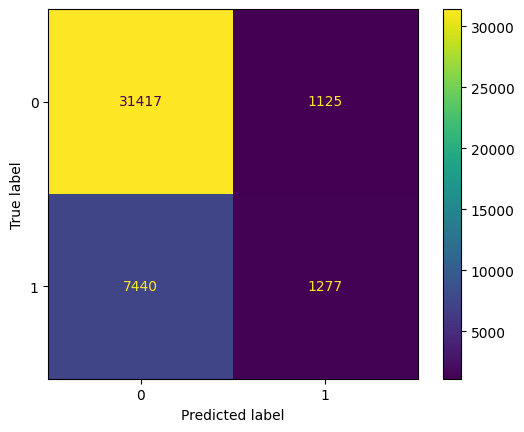

In [535]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

# ROC AUC

In [563]:
df1.isna()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Gender_nan
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163101,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False
163785,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False
164350,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False
164596,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False


c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


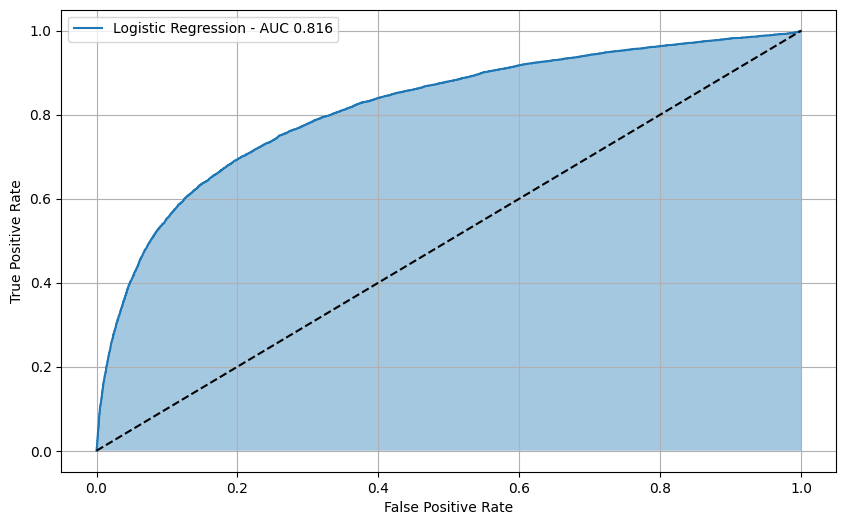

Optimal threshold: 0.25208510560767566


In [580]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define target variable
y = df1['Exited']

# Drop the columns you don't want in your features
X = df1.drop(columns="Exited")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter to avoid convergence issues
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_score = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')  # Random classifier line

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(['Logistic Regression - AUC {:.3f}'.format(roc_auc_score(y_test, y_score))])

ax.fill_between(fpr, tpr, step="pre", alpha=0.4)
plt.grid()
plt.show()

# Calculate the optimal threshold using Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)  # Youden's J statistic
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold:", optimal_threshold)


## cross validation

c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:

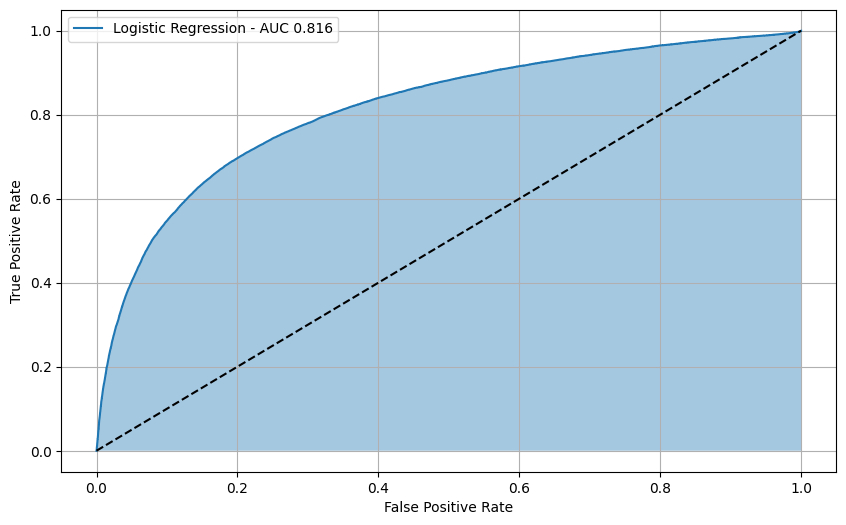

Optimal threshold: 0.2353311626475514


In [548]:
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Define target variable
y = df1['Exited']

# Drop the columns you don't want in your features
X = df1.drop(columns=["Exited", "CustomerId", "Surname"])

# Define logistic regression model
model = LogisticRegression(max_iter=2000)

# Set up stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validated predictions
y_prob = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = roc_auc_score(y, y_prob)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')  # Random classifier line

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(['Logistic Regression - AUC {:.3f}'.format(roc_auc)])

ax.fill_between(fpr, tpr, step="pre", alpha=0.4)
plt.grid()
plt.show()

# Calculate the optimal threshold using Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)  # Youden's J statistic
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold:", optimal_threshold)


# Visualization

In [124]:
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


<Axes: >

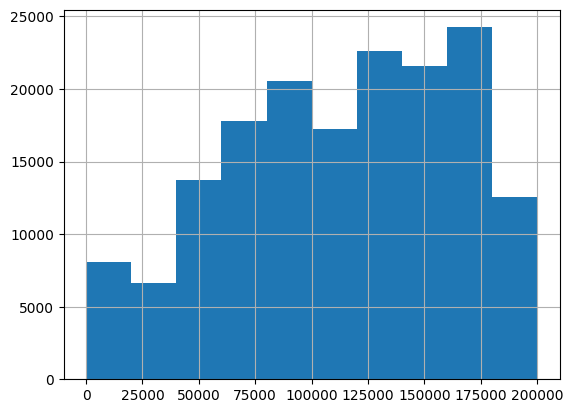

In [127]:
df["EstimatedSalary"].hist()

<Axes: >

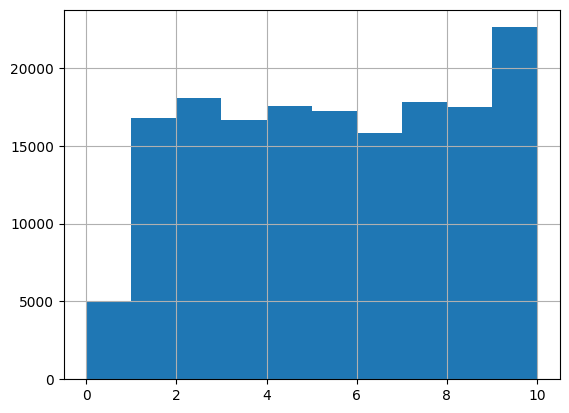

In [128]:
df["Tenure"].hist()

<Axes: >

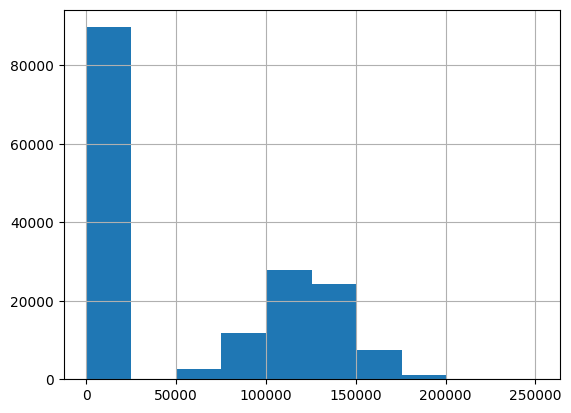

In [129]:
df["Balance"].hist()

<Axes: >

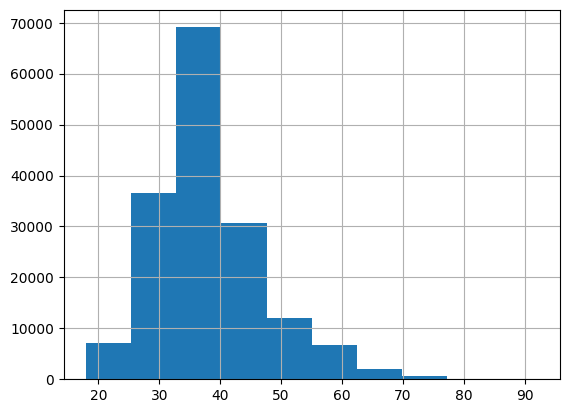

In [130]:
df["Age"].hist()

<Axes: >

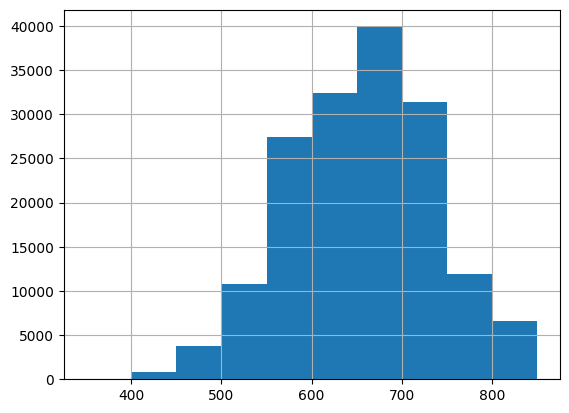

In [131]:
df["CreditScore"].hist()

<Axes: xlabel='Exited', ylabel='CreditScore'>

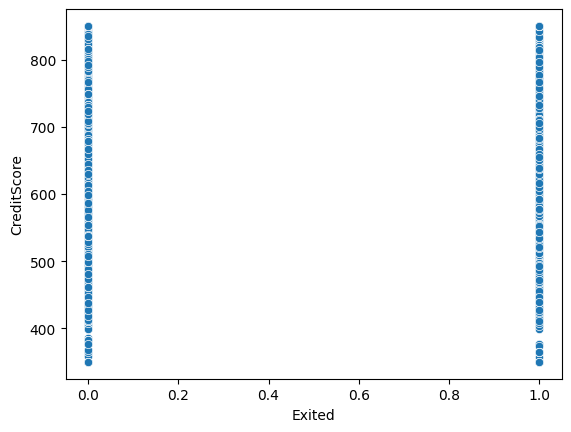

In [132]:
import seaborn as sns
sns.scatterplot(data = df, x = "Exited", y = "CreditScore")

# Correlations

In [103]:
df.head(1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0


In [104]:
df1.head(1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
id,,,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,1.0,33.0,3,0.0,2,1.0,0.0,181449.97,0,0.0,0.0


## Pearson corr

In [139]:
# Pearson Correlatsiyasi funksiyasi(qo'lbola)
def pearson_corr(x, y): 
    x_mean = x.mean()
    y_mean = y.mean()  # This should be y.mean() instead of x.mean()
    surat = np.sum((x - x_mean) * (y - y_mean))
    maxraj = (np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))**(0.5)
    return surat / maxraj

# Pearson  funksiysasi  testi
x = df1['CreditScore'].dropna()
y = df1['Exited'].dropna()
pearson_correlatsiya = pearson_corr(x, y)
print(f"Qo'lbola Pearson: {pearson_correlatsiya}")

Qo'lbola Pearson: -0.027382600061651698


In [135]:
df1.drop(["CustomerId", "Surname", "Geography"], axis=1).corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
CreditScore,1.000000,0.002310,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383,0.002996,0.003833
Gender,0.002310,1.000000,-0.063139,0.008767,-0.014699,0.026098,0.006418,0.033722,-0.007778,-0.146442,-0.039465,0.007480
Age,-0.008918,-0.063139,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768,0.093138,-0.012157
Tenure,0.000942,0.008767,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565,-0.007751,0.004085
Balance,0.006973,-0.014699,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743,0.539208,-0.132364
NumOfProducts,0.011361,0.026098,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554,-0.103034,0.025889
HasCrCard,-0.002828,0.006418,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141,-0.004988,-0.014037
IsActiveMember,0.014790,0.033722,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237,-0.036433,0.014473
EstimatedSalary,-0.001820,-0.007778,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827,0.013298,-0.010587
Exited,-0.027383,-0.146442,0.340768,-0.019565,0.129743,-0.214554,-0.022141,-0.210237,0.018827,1.000000,0.211054,-0.051175


## Spearman

In [140]:
# Spearman Correlatsiyasi funksiyasi(qo'lbola)
def spearman_corr(x, y):
    # Rank the data
    x_rank = pd.Series(x).rank()
    y_rank = pd.Series(y).rank()

    return pearson_corr(x_rank, y_rank)

# Spearman funksiysasi testi
spearman = spearman_corr(x, y)
print(f"Qo'lbola Spearman: {spearman}")

Qo'lbola Spearman: -0.029119711457924878


In [151]:
df1.drop(["CustomerId", "Surname", "Geography"], axis=1).corr(method="spearman")

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
CreditScore,1.000000,0.002829,-0.011804,0.000833,0.005613,0.012970,-0.002723,0.014136,-0.001341,-0.029120,0.001855,0.003105
Gender,0.002829,1.000000,-0.065143,0.008791,-0.013809,0.033719,0.006418,0.033722,-0.009055,-0.146442,-0.039465,0.007480
Age,-0.011804,-0.065143,1.000000,-0.009140,0.065691,-0.128859,-0.011958,-0.029951,-0.000668,0.354665,0.100945,-0.014326
Tenure,0.000833,0.008791,-0.009140,1.000000,-0.009310,0.007814,0.005217,-0.005618,0.001063,-0.019354,-0.007709,0.004219
Balance,0.005613,-0.013809,0.065691,-0.009310,1.000000,-0.381699,-0.016528,-0.014848,0.007332,0.126417,0.526646,-0.129699
NumOfProducts,0.012970,0.033719,-0.128859,0.007814,-0.381699,1.000000,0.007655,0.050301,-0.004472,-0.266771,-0.118981,0.029159
HasCrCard,-0.002723,0.006418,-0.011958,0.005217,-0.016528,0.007655,1.000000,-0.021034,0.003562,-0.022141,-0.004988,-0.014037
IsActiveMember,0.014136,0.033722,-0.029951,-0.005618,-0.014848,0.050301,-0.021034,1.000000,-0.007859,-0.210237,-0.036433,0.014473
EstimatedSalary,-0.001341,-0.009055,-0.000668,0.001063,0.007332,-0.004472,0.003562,-0.007859,1.000000,0.019997,0.012722,-0.009520
Exited,-0.029120,-0.146442,0.354665,-0.019354,0.126417,-0.266771,-0.022141,-0.210237,0.019997,1.000000,0.211054,-0.051175


## Kendall Tau

In [142]:
df1.drop(["CustomerId", "Surname", "Geography"], axis=1).corr(method = "kendall")

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
CreditScore,1.000000,0.002315,-0.008065,0.000579,0.004103,0.010527,-0.002229,0.011569,-0.000909,-0.023833,0.001518,0.002541
Gender,0.002315,1.000000,-0.054144,0.007525,-0.012306,0.033396,0.006418,0.033722,-0.007393,-0.146442,-0.039465,0.007480
Age,-0.008065,-0.054144,1.000000,-0.006501,0.048641,-0.106135,-0.009939,-0.024894,-0.000461,0.294786,0.083902,-0.011908
Tenure,0.000579,0.007525,-0.006501,1.000000,-0.007108,0.006623,0.004465,-0.004808,0.000741,-0.016566,-0.006598,0.003611
Balance,0.004103,-0.012306,0.048641,-0.007108,1.000000,-0.336844,-0.014729,-0.013232,0.005320,0.112658,0.469325,-0.115583
NumOfProducts,0.010527,0.033396,-0.106135,0.006623,-0.336844,1.000000,0.007581,0.049820,-0.003616,-0.264221,-0.117843,0.028880
HasCrCard,-0.002229,0.006418,-0.009939,0.004465,-0.014729,0.007581,1.000000,-0.021034,0.002908,-0.022141,-0.004988,-0.014037
IsActiveMember,0.011569,0.033722,-0.024894,-0.004808,-0.013232,0.049820,-0.021034,1.000000,-0.006417,-0.210237,-0.036433,0.014473
EstimatedSalary,-0.000909,-0.007393,-0.000461,0.000741,0.005320,-0.003616,0.002908,-0.006417,1.000000,0.016328,0.010388,-0.007773
Exited,-0.023833,-0.146442,0.294786,-0.016566,0.112658,-0.264221,-0.022141,-0.210237,0.016328,1.000000,0.211054,-0.051175


In [164]:
from scipy.stats import kendalltau
correlation, p_value = kendalltau(df1["Spain"], df["Exited"])
print(correlation)
print(p_value)

-0.05117516602149165
5.383627400463947e-96


Kendal tau da hamma p_valuelari 0 ga teng bo'ldi, demak correlatsiya bor degani

## PointBiserial

In [169]:
from scipy.stats import pointbiserialr

# Библиотечный расчет пункт-бисериального коэффициента корреляции
r_pb_lib, p_value = pointbiserialr(df1["Age"], df1["Exited"])

print("Библиотечный пункт-бисериальный коэффициент корреляции:", r_pb_lib)
print("p-value:", p_value)

Библиотечный пункт-бисериальный коэффициент корреляции: 0.34076816340758004
p-value: 0.0


In [170]:
r_pb_lib, p_value = pointbiserialr(df1["CreditScore"], df1["Exited"])

print("Библиотечный пункт-бисериальный коэффициент корреляции:", r_pb_lib)
print("p-value:", p_value)

Библиотечный пункт-бисериальный коэффициент корреляции: -0.027382600061651705
p-value: 9.373557251572754e-29


In [171]:
r_pb_lib, p_value = pointbiserialr(df1["Tenure"], df1["Exited"])

print("Библиотечный пункт-бисериальный коэффициент корреляции:", r_pb_lib)
print("p-value:", p_value)

Библиотечный пункт-бисериальный коэффициент корреляции: -0.019564844484077415
p-value: 1.88331794163078e-15


In [172]:
r_pb_lib, p_value = pointbiserialr(df1["Balance"], df1["Exited"])

print("Библиотечный пункт-бисериальный коэффициент корреляции:", r_pb_lib)
print("p-value:", p_value)

Библиотечный пункт-бисериальный коэффициент корреляции: 0.1297428604840111
p-value: 0.0


In [173]:
r_pb_lib, p_value = pointbiserialr(df1["EstimatedSalary"], df1["Exited"])

print("Библиотечный пункт-бисериальный коэффициент корреляции:", r_pb_lib)
print("p-value:", p_value)

Библиотечный пункт-бисериальный коэффициент корреляции: 0.018826805670812893
p-value: 2.0271773711883294e-14


Numeric va Binar featurelarni correlatsiyasini ham ko'rib chiqdim, muammo yo'q

## Phi coefficent

In [181]:
def phi_coef_manual(df=None, x=None, y=None):
    if df is not None:
        # Если передан DataFrame, берем два первых столбца
        x = df.iloc[:, 0]
        y = df.iloc[:, 1]
    elif x is None or y is None:
        raise ValueError("Необходимо передать либо DataFrame, либо два столбца x и y.")
    if len(x.unique()) == 2 and len(y.unique()) == 2:
        a = np.sum((x == np.unique(x)[0]) & (y == np.unique(y)[0]))
        b = np.sum((x == np.unique(x)[1]) & (y == np.unique(y)[0]))
        c = np.sum((x == np.unique(x)[0]) & (y == np.unique(y)[1]))
        d = np.sum((x == np.unique(x)[1]) & (y == np.unique(y)[1]))
        confusion_matrix = np.array([[a,b],[c,d]])
        return (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
    else:
        raise ValueError("Оба столбца должны быть бинарными (ровно 2 уникальных значения в каждом).")

In [186]:
df1.nunique()

CustomerId         23221
Surname             2797
CreditScore          457
Geography              3
Gender                 2
Age                   71
Tenure                11
Balance            30075
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55298
Exited                 2
Germany                2
Spain                  2
dtype: int64

In [198]:
phi_coef_manual(x = df1["Gender"], y = df1["Exited"])

C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\1530399073.py:14: RuntimeWarning: overflow encountered in scalar multiply
  return (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\1530399073.py:14: RuntimeWarning: invalid value encountered in sqrt
  return (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))


np.float64(nan)

In [191]:
phi_coef_manual(x = df1["HasCrCard"], y = df1["Exited"])

C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\1530399073.py:14: RuntimeWarning: overflow encountered in scalar multiply
  return (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))


np.float64(-0.04995277238848026)

In [190]:
phi_coef_manual(x = df1["Spain"], y = df1["Exited"])

C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\1530399073.py:14: RuntimeWarning: overflow encountered in scalar multiply
  return (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))


np.float64(-0.1420898726135343)

In [189]:
phi_coef_manual(x = df1["Germany"], y = df1["Exited"])

C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\1530399073.py:14: RuntimeWarning: overflow encountered in scalar multiply
  return (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))


np.float64(0.6656724291786004)

## Cramer's V

In [200]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V and p-value
def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Perform Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Number of observations
    n = contingency_table.sum().sum()
    
    # Find the minimum dimension of the contingency table
    k = min(contingency_table.shape)
    
    # Calculate Cramér's V
    cramers_v = np.sqrt(chi2 / (n * (k - 1)))
    
    return cramers_v, p


In [201]:
df1.nunique()

CustomerId         23221
Surname             2797
CreditScore          457
Geography              3
Gender                 2
Age                   71
Tenure                11
Balance            30075
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55298
Exited                 2
Germany                2
Spain                  2
dtype: int64

In [202]:
# Example data
x = df1["Gender"]
y = df1["Exited"]

# Calculate Cramér's V and p-value
v, p_value = cramers_v(x, y)
print(f"Cramér's V: {v}")
print(f"p-value: {p_value}")


Cramér's V: 0.14642659893297552
p-value: 0.0


In [206]:
# Example data
x = df1["HasCrCard"]
y = df1["Exited"]

# Calculate Cramér's V and p-value
v, p_value = cramers_v(x, y)
print(f"Cramér's V: {v}")
print(f"p-value: {p_value}")

Cramér's V: 0.022124110993038487
p-value: 2.5226925668481934e-19


In [207]:
# Example data
x = df1["IsActiveMember"]
y = df1["Exited"]

# Calculate Cramér's V and p-value
v, p_value = cramers_v(x, y)
print(f"Cramér's V: {v}")
print(f"p-value: {p_value}")

Cramér's V: 0.2102221903450902
p-value: 0.0


In [208]:
# Example data
x = df1["Germany"]
y = df1["Exited"]

# Calculate Cramér's V and p-value
v, p_value = cramers_v(x, y)
print(f"Cramér's V: {v}")
print(f"p-value: {p_value}")


# Example data
x = df1["Spain"]
y = df1["Exited"]

# Calculate Cramér's V and p-value
v, p_value = cramers_v(x, y)
print(f"Cramér's V: {v}")
print(f"p-value: {p_value}")

Cramér's V: 0.21103550522618586
p-value: 0.0
Cramér's V: 0.05115724287873842
p-value: 6.257273553585017e-96


In [205]:
df1.drop(["CustomerId", "Surname", "Geography"], axis=1).corr(method = "kendall")

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
CreditScore,1.000000,0.002315,-0.008065,0.000579,0.004103,0.010527,-0.002229,0.011569,-0.000909,-0.023833,0.001518,0.002541
Gender,0.002315,1.000000,-0.054144,0.007525,-0.012306,0.033396,0.006418,0.033722,-0.007393,-0.146442,-0.039465,0.007480
Age,-0.008065,-0.054144,1.000000,-0.006501,0.048641,-0.106135,-0.009939,-0.024894,-0.000461,0.294786,0.083902,-0.011908
Tenure,0.000579,0.007525,-0.006501,1.000000,-0.007108,0.006623,0.004465,-0.004808,0.000741,-0.016566,-0.006598,0.003611
Balance,0.004103,-0.012306,0.048641,-0.007108,1.000000,-0.336844,-0.014729,-0.013232,0.005320,0.112658,0.469325,-0.115583
NumOfProducts,0.010527,0.033396,-0.106135,0.006623,-0.336844,1.000000,0.007581,0.049820,-0.003616,-0.264221,-0.117843,0.028880
HasCrCard,-0.002229,0.006418,-0.009939,0.004465,-0.014729,0.007581,1.000000,-0.021034,0.002908,-0.022141,-0.004988,-0.014037
IsActiveMember,0.011569,0.033722,-0.024894,-0.004808,-0.013232,0.049820,-0.021034,1.000000,-0.006417,-0.210237,-0.036433,0.014473
EstimatedSalary,-0.000909,-0.007393,-0.000461,0.000741,0.005320,-0.003616,0.002908,-0.006417,1.000000,0.016328,0.010388,-0.007773
Exited,-0.023833,-0.146442,0.294786,-0.016566,0.112658,-0.264221,-0.022141,-0.210237,0.016328,1.000000,0.211054,-0.051175


## Phi_K

In [212]:
df_number = df.select_dtypes(include = 'number')
df_number

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,
0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...
165029,15667085,667,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,792,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,565,31.0,5,0.00,1,1.0,1.0,127429.56,0


In [213]:
intervals_cols = df_number.columns.tolist()
intervals_cols

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [221]:
phik_overview = df.phik_matrix(interval_cols=intervals_cols)
phik_overview

c:\Python\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2797. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.520039,0.035770,0.010678,0.012765,0.033878,0.018415,0.040632,0.009511,0.020721,0.008903,0.043853,0.018113
Surname,0.520039,1.000000,0.472652,0.409580,0.160533,0.446364,0.334644,0.662431,0.277860,0.163699,0.129240,0.546232,0.239326
CreditScore,0.035770,0.472652,1.000000,0.031061,0.008456,0.036709,0.025608,0.047280,0.026427,0.037877,0.017424,0.047571,0.048688
Geography,0.010678,0.409580,0.031061,1.000000,0.023764,0.142954,0.029232,0.559024,0.111706,0.009876,0.022023,0.034919,0.127751
Gender,0.012765,0.160533,0.008456,0.023764,1.000000,0.100415,0.011293,0.024131,0.086019,0.009287,0.052786,0.020706,0.227953
Age,0.033878,0.446364,0.036709,0.142954,0.100415,1.000000,0.031983,0.098499,0.199934,0.023919,0.138147,0.047875,0.521917
Tenure,0.018415,0.334644,0.025608,0.029232,0.011293,0.031983,1.000000,0.040571,0.041085,0.015180,0.021014,0.025769,0.049479
Balance,0.040632,0.662431,0.047280,0.559024,0.024131,0.098499,0.040571,1.000000,0.397316,0.036160,0.022327,0.057123,0.189029
NumOfProducts,0.009511,0.277860,0.026427,0.111706,0.086019,0.199934,0.041085,0.397316,1.000000,0.020364,0.126545,0.026144,0.607392
HasCrCard,0.020721,0.163699,0.037877,0.009876,0.009287,0.023919,0.015180,0.036160,0.020364,1.000000,0.032783,0.018800,0.034529


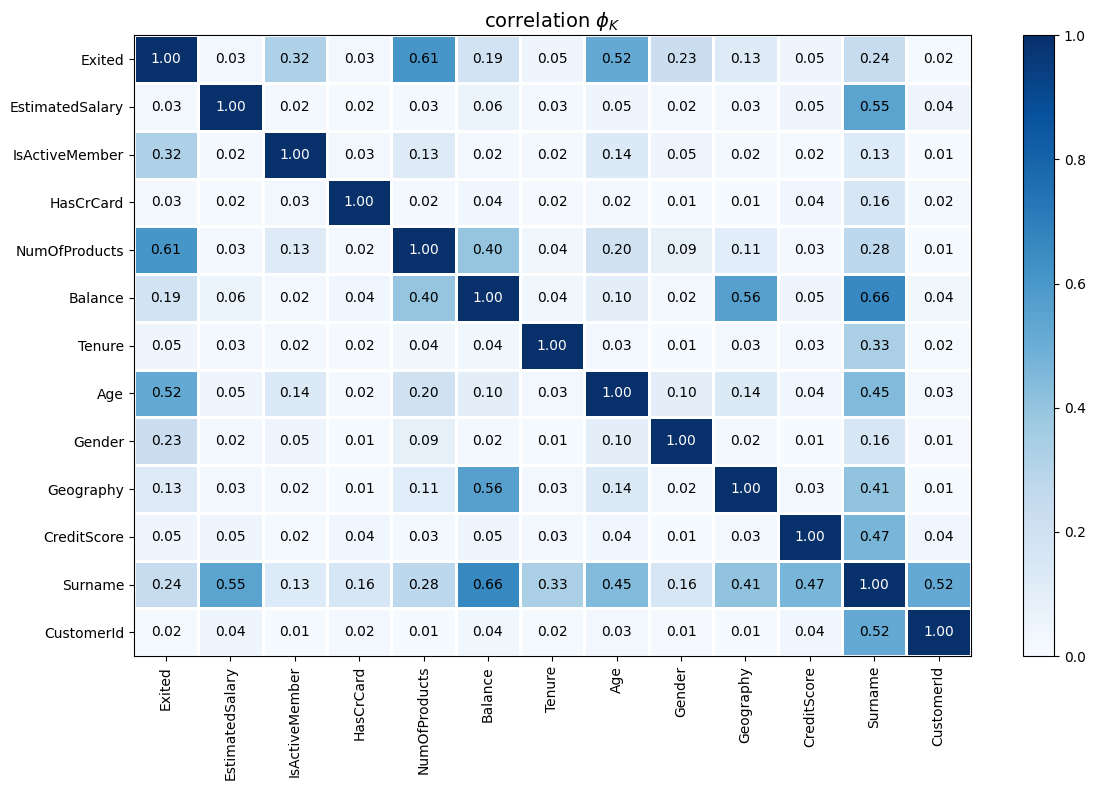

In [222]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(12,8))
plt.tight_layout()

In [223]:
global_correlation, global_labels = df.global_phik(interval_cols=intervals_cols)
for c, l in zip(global_correlation, global_labels):
    print(l, c[0])

c:\Python\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2797. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


CustomerId nan
Surname 1.0
CreditScore nan
Geography 0.5865663894766173
Gender 0.10796159121845327
Age nan
Tenure nan
Balance nan
NumOfProducts 0.7025374148482324
HasCrCard nan
IsActiveMember 0.30934216759053207
EstimatedSalary nan
Exited 0.7569282159350165


c:\Python\Lib\site-packages\phik\phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


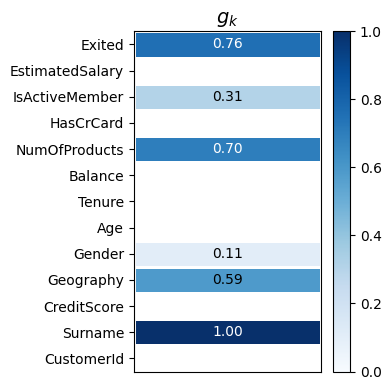

In [224]:
plot_correlation_matrix(global_correlation, x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(4,4),
                        color_map='Blues', title=r'$g_k$',
                        fontsize_factor=1)
plt.tight_layout()

In [225]:
significance_overview = df.significance_matrix(interval_cols=intervals_cols)

c:\Python\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2797. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


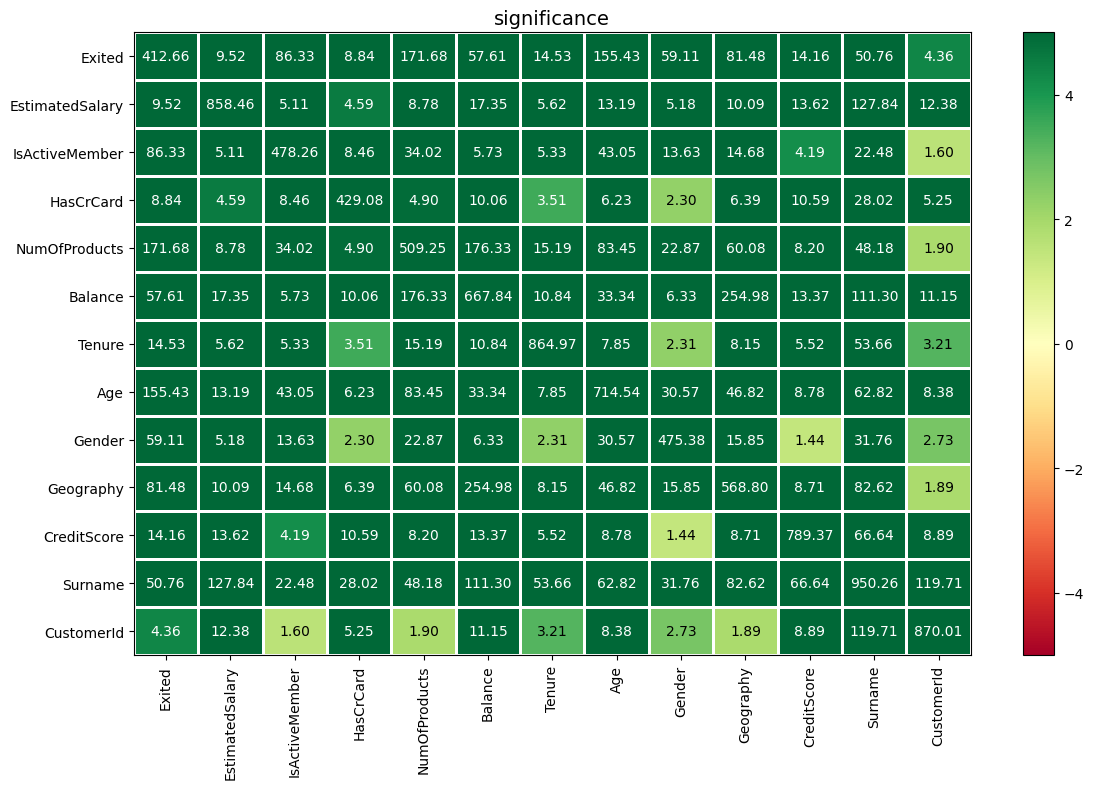

In [226]:
plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1, figsize=(12,8))
plt.tight_layout()

# WoE

In [581]:
def WoE(data, feature_name, target_name):
    df = data.copy()
    woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0:'# of non-events'})
    woe_table['Percentage events'] = woe_table['# of events'] / woe_table['# of events'].sum()
    woe_table['Percentage non-events'] = woe_table['# of non-events'] / woe_table['# of non-events'].sum()
    woe_table['WoE'] = np.log(woe_table['Percentage events'] / woe_table['Percentage non-events'])
    # woe_table['Rank'] = woe_table['WoE'].rank()
    
    return woe_table

In [582]:
def WoE_v2(data, feature_name, target_name):
    df = data.copy()
    
    # Group by the feature and calculate the count of events and non-events
    woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})
    
    # Calculate percentages
    woe_table['Percentage events'] = woe_table['# of events'] / woe_table['# of events'].sum()
    woe_table['Percentage non-events'] = woe_table['# of non-events'] / woe_table['# of non-events'].sum()
    
    # Calculate WoE
    woe_table['WoE'] = np.log(woe_table['Percentage events'] / woe_table['Percentage non-events'])
    
    # Add total observations and their percentage
    woe_table['Total Observations'] = woe_table['# of events'] + woe_table['# of non-events']
    woe_table['Percent of Observations'] = (woe_table['Total Observations'] / woe_table['Total Observations'].sum() * 100).round(3)

    return woe_table.reset_index()

In [583]:
def plot_woe(df, col_name,  x_axis_rotation):
    df_woe = df.copy()
    plt.grid()
    sns.scatterplot(data = df_woe, x=col_name, y='WoE')
    sns.lineplot(data=df_woe, x=col_name, y='WoE', color='red', linewidth=2)
    plt.xticks(rotation=x_axis_rotation)
    plt.show()


In [ ]:
df1

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
id,,,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,1.0,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.0,0.0
1,15749177,Okwudiliolisa,627,France,1.0,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.0,0.0
2,15694510,Hsueh,678,France,1.0,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.0,0.0
3,15741417,Kao,581,France,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.0,0.0
4,15766172,Chiemenam,716,Spain,1.0,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,0.0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.0,1.0
165030,15665521,Okechukwu,792,France,1.0,35.0,3,0.00,1,0.0,0.0,131834.45,0,0.0,0.0
165031,15664752,Hsia,565,France,1.0,31.0,5,0.00,1,1.0,1.0,127429.56,0,0.0,0.0


### Age_Cat

In [ ]:
df3 = df1.copy()
df3['Age_Cat'] = pd.qcut(df3['Age'], q=20)
# df3['Age_Cat'] = pd.cut(df3['Age'], bins=10)
df3

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Age_Cat
id,,,,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,1.0,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.0,0.0,"(32.0, 33.0]"
1,15749177,Okwudiliolisa,627,France,1.0,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.0,0.0,"(32.0, 33.0]"
2,15694510,Hsueh,678,France,1.0,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.0,0.0,"(39.0, 40.0]"
3,15741417,Kao,581,France,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.0,0.0,"(33.0, 34.0]"
4,15766172,Chiemenam,716,Spain,1.0,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,1.0,"(32.0, 33.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,0.0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.0,1.0,"(32.0, 33.0]"
165030,15665521,Okechukwu,792,France,1.0,35.0,3,0.00,1,0.0,0.0,131834.45,0,0.0,0.0,"(34.0, 35.0]"
165031,15664752,Hsia,565,France,1.0,31.0,5,0.00,1,1.0,1.0,127429.56,0,0.0,0.0,"(30.0, 31.0]"


In [ ]:
df_woe = WoE_v2(df3, 'Age_Cat', 'Exited')
df_woe

C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


Exited,Age_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(17.999, 26.0]",8897,878,0.025142,0.068379,-1.000508,9775,5.923
1,"(26.0, 28.0]",6762,558,0.015979,0.051970,-1.179400,7320,4.435
2,"(28.0, 30.0]",10824,950,0.027204,0.083189,-1.117744,11774,7.134
3,"(30.0, 31.0]",6494,599,0.017153,0.049910,-1.068057,7093,4.298
4,"(31.0, 32.0]",7127,585,0.016752,0.054775,-1.184719,7712,4.673
5,"(32.0, 33.0]",7535,833,0.023854,0.057911,-0.886966,8368,5.070
6,"(33.0, 34.0]",8030,595,0.017038,0.061716,-1.287063,8625,5.226
7,"(34.0, 35.0]",7986,1132,0.032416,0.061377,-0.638389,9118,5.525
8,"(35.0, 36.0]",7587,969,0.027748,0.058311,-0.742612,8556,5.184
9,"(36.0, 37.0]",8154,1102,0.031557,0.062669,-0.686067,9256,5.609


In [ ]:
df3['Age_Cat'].value_counts(normalize=True).sort_index()*100

Age_Cat
(17.999, 26.0]    5.923022
(26.0, 28.0]      4.435450
(28.0, 30.0]      7.134287
(30.0, 31.0]      4.297902
(31.0, 32.0]      4.672976
(32.0, 33.0]      5.070470
(33.0, 34.0]      5.226196
(34.0, 35.0]      5.524922
(35.0, 36.0]      5.184386
(36.0, 37.0]      5.608541
(37.0, 38.0]      5.602482
(38.0, 39.0]      4.813554
(39.0, 40.0]      4.845062
(40.0, 41.0]      3.882230
(41.0, 42.0]      3.106027
(42.0, 44.0]      5.478871
(44.0, 46.0]      4.457263
(46.0, 50.0]      5.570367
(50.0, 56.0]      4.694184
(56.0, 92.0]      4.471806
Name: proportion, dtype: float64

Exited,Age_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(17.999, 26.0]",8897,878,0.025142,0.068379,-1.000508,9775,5.923
1,"(26.0, 28.0]",6762,558,0.015979,0.051970,-1.179400,7320,4.435
2,"(28.0, 30.0]",10824,950,0.027204,0.083189,-1.117744,11774,7.134
3,"(30.0, 31.0]",6494,599,0.017153,0.049910,-1.068057,7093,4.298
4,"(31.0, 32.0]",7127,585,0.016752,0.054775,-1.184719,7712,4.673
5,"(32.0, 33.0]",7535,833,0.023854,0.057911,-0.886966,8368,5.070
6,"(33.0, 34.0]",8030,595,0.017038,0.061716,-1.287063,8625,5.226
7,"(34.0, 35.0]",7986,1132,0.032416,0.061377,-0.638389,9118,5.525
8,"(35.0, 36.0]",7587,969,0.027748,0.058311,-0.742612,8556,5.184
9,"(36.0, 37.0]",8154,1102,0.031557,0.062669,-0.686067,9256,5.609


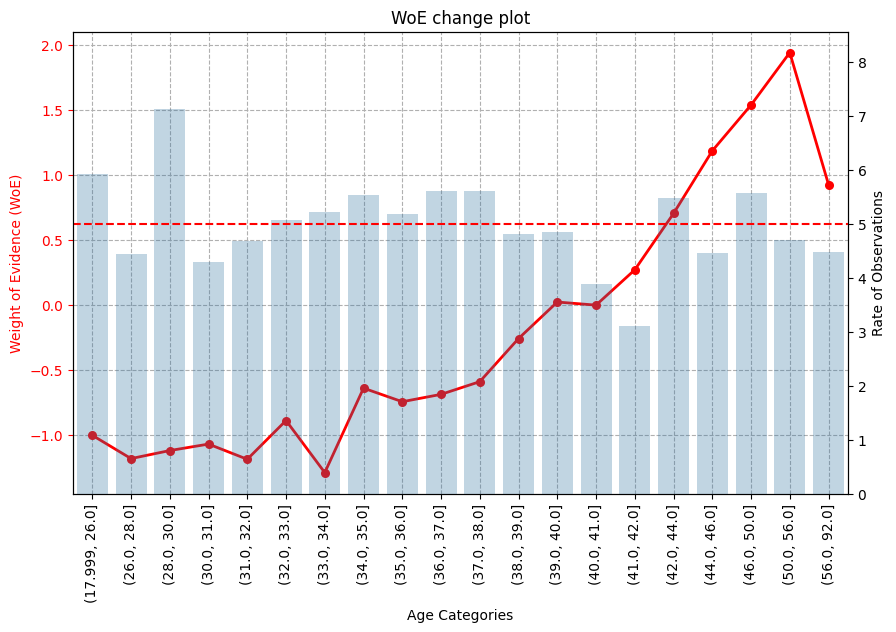

In [ ]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='Age_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('Age Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='Age_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

In [ ]:
-np.inf(), 32, 34, 38, 39, 42, 44, 56, 50, 56, 92 np.inf()

In [588]:
df3 = df1.copy()
df3['Age_Cat'] = pd.cut(df3['Age'], bins=[-1, 34, 37, 39, 41, 43, 46, 53, 93])
ordinal_encoder = OrdinalEncoder()
df3['Age_Cat'] = ordinal_encoder.fit_transform(df3[['Age_Cat']])
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_Cat
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,0.0,0.0,0.0,1.0,0.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,0.0,0.0,0.0,1.0,0.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,0.0,0.0,0.0,1.0,3.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,0.0,0.0,0.0,1.0,0.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# df['Age_Cat'] = pd.qcut(df['Age'], q=10)
df3['Age_Cat'] = pd.cut(df3['Age'], bins=[-1, 34, 37, 39, 41, 43, 46, 53, 93])
df_woe = WoE_v2(df3, 'Age_Cat', 'Exited')
df_woe

C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


Exited,Age_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(-1, 34]",55669,4998,0.143123,0.427851,-1.095071,60667,36.760
1,"(34, 37]",23727,3203,0.091721,0.182357,-0.687211,26930,16.318
2,"(37, 39]",14626,2564,0.073423,0.112410,-0.425917,17190,10.416
3,"(39, 41]",11325,3078,0.088142,0.087040,0.012582,14403,8.727
4,"(41, 43]",6942,3131,0.089660,0.053354,0.519077,10073,6.104
5,"(43, 46]",6631,4820,0.138026,0.050963,0.996333,11451,6.939
6,"(46, 53]",5649,7942,0.227428,0.043416,1.656002,13591,8.235
7,"(53, 93]",5544,5185,0.148478,0.042609,1.248369,10729,6.501


Exited,Age_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(-1, 34]",55669,4998,0.143123,0.427851,-1.095071,60667,36.760
1,"(34, 37]",23727,3203,0.091721,0.182357,-0.687211,26930,16.318
2,"(37, 39]",14626,2564,0.073423,0.112410,-0.425917,17190,10.416
3,"(39, 41]",11325,3078,0.088142,0.087040,0.012582,14403,8.727
4,"(41, 43]",6942,3131,0.089660,0.053354,0.519077,10073,6.104
5,"(43, 46]",6631,4820,0.138026,0.050963,0.996333,11451,6.939
6,"(46, 53]",5649,7942,0.227428,0.043416,1.656002,13591,8.235
7,"(53, 93]",5544,5185,0.148478,0.042609,1.248369,10729,6.501


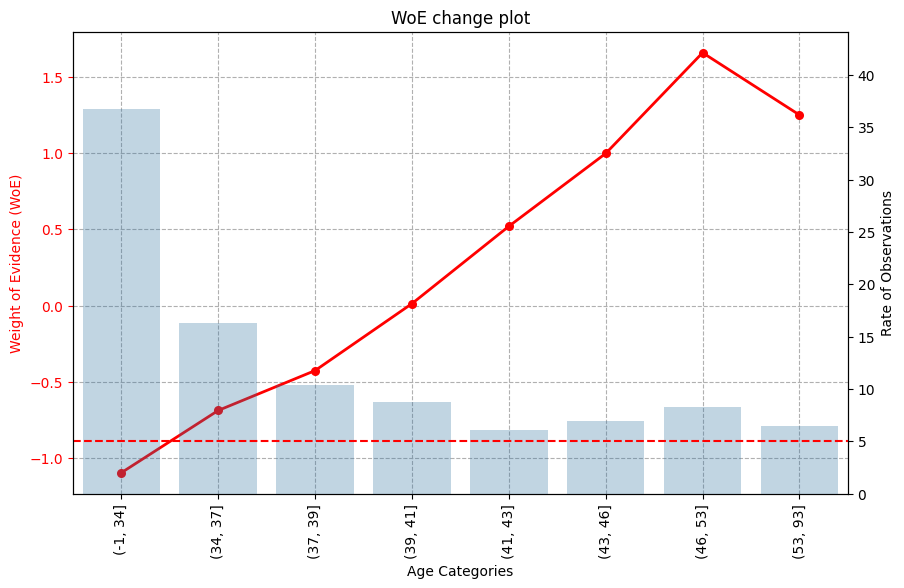

In [ ]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='Age_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('Age Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='Age_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

### CreditScore_Cat

In [ ]:
df3 = df1.copy()
df3['CreditScore_Cat'] = pd.qcut(df3['CreditScore'], q=20)
# df3['CreditScore_Cat'] = pd.cut(df3['CreditScore'], bins=10)
df3

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,CreditScore_Cat
id,,,,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,1.0,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.0,0.0,"(659.0, 671.0]"
1,15749177,Okwudiliolisa,627,France,1.0,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.0,0.0,"(613.0, 628.0]"
2,15694510,Hsueh,678,France,1.0,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.0,0.0,"(671.0, 681.0]"
3,15741417,Kao,581,France,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.0,0.0,"(574.0, 587.0]"
4,15766172,Chiemenam,716,Spain,1.0,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,1.0,"(710.0, 721.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,0.0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.0,1.0,"(659.0, 671.0]"
165030,15665521,Okechukwu,792,France,1.0,35.0,3,0.00,1,0.0,0.0,131834.45,0,0.0,0.0,"(787.0, 850.0]"
165031,15664752,Hsia,565,France,1.0,31.0,5,0.00,1,1.0,1.0,127429.56,0,0.0,0.0,"(554.0, 574.0]"


In [ ]:
df_woe = WoE_v2(df3, 'CreditScore_Cat', 'Exited')
df_woe

C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


Exited,CreditScore_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(349.999, 524.0]",6485,1815,0.051974,0.049841,0.041909,8300,5.029
1,"(524.0, 554.0]",6783,2405,0.068870,0.052132,0.278445,9188,5.567
2,"(554.0, 574.0]",5786,1678,0.048051,0.044469,0.077476,7464,4.523
3,"(574.0, 587.0]",6465,1888,0.054065,0.049688,0.084430,8353,5.061
4,"(587.0, 597.0]",6341,1704,0.048796,0.048735,0.001257,8045,4.875
5,"(597.0, 613.0]",6581,1796,0.051430,0.050579,0.016690,8377,5.076
6,"(613.0, 628.0]",6651,1889,0.054094,0.051117,0.056595,8540,5.175
7,"(628.0, 638.0]",6259,1916,0.054867,0.048104,0.131534,8175,4.954
8,"(638.0, 648.0]",6411,1850,0.052977,0.049273,0.072485,8261,5.006
9,"(648.0, 659.0]",6202,1777,0.050886,0.047666,0.065370,7979,4.835


In [ ]:
df3['CreditScore_Cat'].value_counts(normalize=True).sort_index()*100

CreditScore_Cat
(349.999, 524.0]    5.029267
(524.0, 554.0]      5.567338
(554.0, 574.0]      4.522704
(574.0, 587.0]      5.061381
(587.0, 597.0]      4.874753
(597.0, 613.0]      5.075924
(613.0, 628.0]      5.174691
(628.0, 638.0]      4.953525
(638.0, 648.0]      5.005635
(648.0, 659.0]      4.834761
(659.0, 671.0]      4.951707
(671.0, 681.0]      5.164996
(681.0, 687.0]      4.925652
(687.0, 701.0]      4.938982
(701.0, 710.0]      5.100767
(710.0, 721.0]      4.932923
(721.0, 735.0]      4.962008
(735.0, 754.0]      5.185598
(754.0, 787.0]      4.774168
(787.0, 850.0]      4.963220
Name: proportion, dtype: float64

Exited,CreditScore_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(349.999, 524.0]",6485,1815,0.051974,0.049841,0.041909,8300,5.029
1,"(524.0, 554.0]",6783,2405,0.068870,0.052132,0.278445,9188,5.567
2,"(554.0, 574.0]",5786,1678,0.048051,0.044469,0.077476,7464,4.523
3,"(574.0, 587.0]",6465,1888,0.054065,0.049688,0.084430,8353,5.061
4,"(587.0, 597.0]",6341,1704,0.048796,0.048735,0.001257,8045,4.875
5,"(597.0, 613.0]",6581,1796,0.051430,0.050579,0.016690,8377,5.076
6,"(613.0, 628.0]",6651,1889,0.054094,0.051117,0.056595,8540,5.175
7,"(628.0, 638.0]",6259,1916,0.054867,0.048104,0.131534,8175,4.954
8,"(638.0, 648.0]",6411,1850,0.052977,0.049273,0.072485,8261,5.006
9,"(648.0, 659.0]",6202,1777,0.050886,0.047666,0.065370,7979,4.835


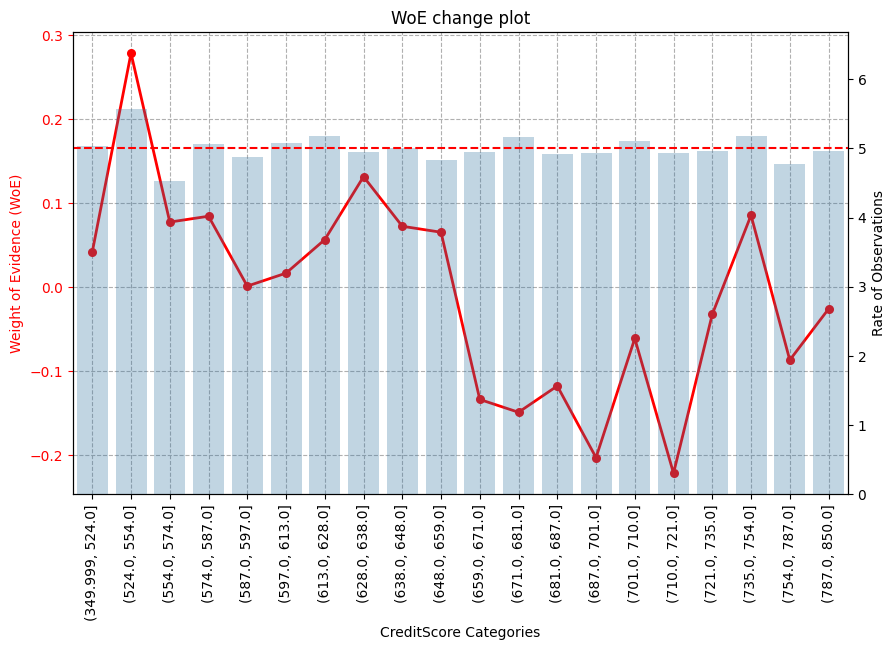

In [ ]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='CreditScore_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('CreditScore Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='CreditScore_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

In [ ]:
# -np.inf(), 340, 536, 624, 650, 667, 707, 721, 773, 851 np.inf()

In [ ]:
# -np.inf(), 340, 536, 659, 687, 721, 750, 851 np.inf()

In [ ]:
# df['Age_Cat'] = pd.qcut(df['Age'], q=10)
df3['CreditScore_Cat'] = pd.cut(df3['CreditScore'], bins=[340, 536, 659, 687, 721, 750, 851])
df_woe = WoE_v2(df3, 'CreditScore_Cat', 'Exited')
df_woe

C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


Exited,CreditScore_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(340, 536]",8505,2571,0.073623,0.065366,0.118956,11076,6.711
1,"(536, 659]",55459,16147,0.462387,0.426237,0.081405,71606,43.389
2,"(659, 687]",20104,4721,0.135191,0.154512,-0.133583,24825,15.042
3,"(687, 721]",20107,4603,0.131812,0.154535,-0.159045,24710,14.973
4,"(721, 750]",11336,3142,0.089975,0.087124,0.032191,14478,8.773
5,"(750, 851]",14602,3737,0.107013,0.112226,-0.047560,18339,11.112


Exited,CreditScore_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(340, 536]",8505,2571,0.073623,0.065366,0.118956,11076,6.711
1,"(536, 659]",55459,16147,0.462387,0.426237,0.081405,71606,43.389
2,"(659, 687]",20104,4721,0.135191,0.154512,-0.133583,24825,15.042
3,"(687, 721]",20107,4603,0.131812,0.154535,-0.159045,24710,14.973
4,"(721, 750]",11336,3142,0.089975,0.087124,0.032191,14478,8.773
5,"(750, 851]",14602,3737,0.107013,0.112226,-0.047560,18339,11.112


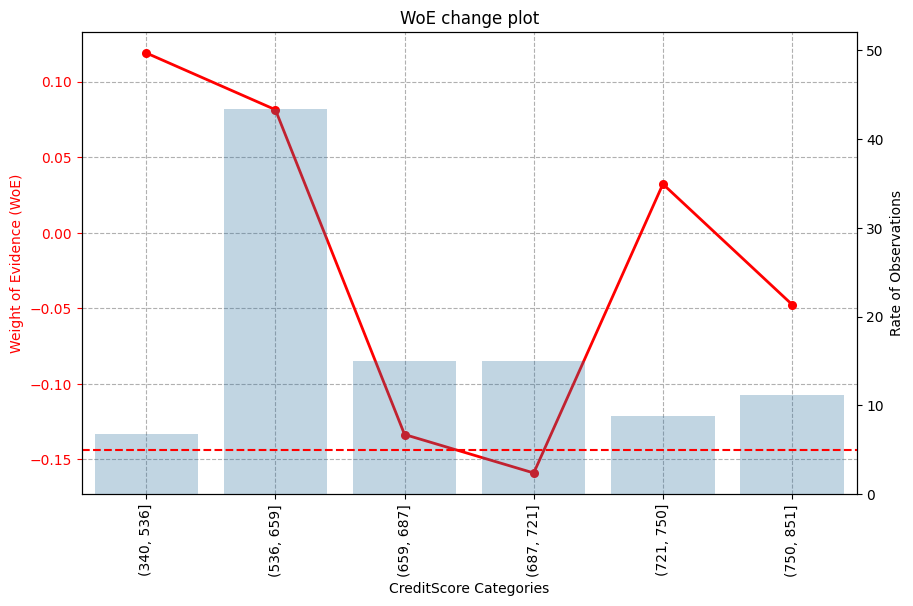

In [ ]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='CreditScore_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('CreditScore Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='CreditScore_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

### Balance_Cat

In [ ]:
df1["Balance"].value_counts()

Balance
0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
115280.68        1
132876.90        1
133656.05        1
111973.43        1
153711.26        1
Name: count, Length: 30075, dtype: int64

In [ ]:
df1.groupby("Balance")["Exited"]

In [ ]:
df1.groupby("Balance")["Exited"].count().sort_values()


Balance
214346.96        1
141573.57        1
141581.06        1
141581.07        1
141581.51        1
             ...  
129855.32       59
122314.50       63
127864.40       64
124577.33       88
0.00         89648
Name: Exited, Length: 30075, dtype: int64

<Axes: >

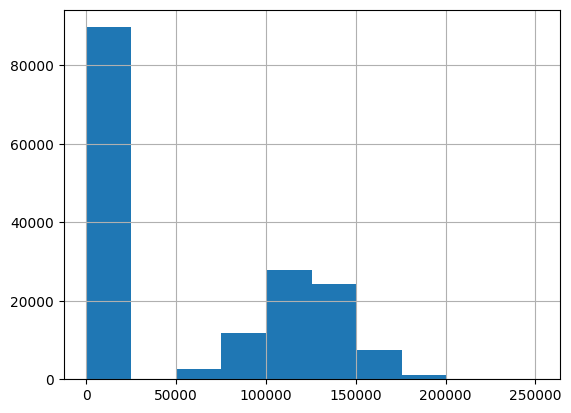

In [ ]:
df1["Balance"].hist()

In [ ]:
df3 = df1.copy()
#df3['Balance_Cat'] = pd.qcut(df3['Balance'], q=5)
df3['Balance_Cat'] = pd.cut(df3['Balance'], bins=5)
df3

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Balance_Cat
id,,,,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,1.0,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.0,0.0,"(-250.898, 50179.618]"
1,15749177,Okwudiliolisa,627,France,1.0,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.0,0.0,"(-250.898, 50179.618]"
2,15694510,Hsueh,678,France,1.0,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.0,0.0,"(-250.898, 50179.618]"
3,15741417,Kao,581,France,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.0,0.0,"(100359.236, 150538.854]"
4,15766172,Chiemenam,716,Spain,1.0,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,1.0,"(-250.898, 50179.618]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,0.0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.0,1.0,"(-250.898, 50179.618]"
165030,15665521,Okechukwu,792,France,1.0,35.0,3,0.00,1,0.0,0.0,131834.45,0,0.0,0.0,"(-250.898, 50179.618]"
165031,15664752,Hsia,565,France,1.0,31.0,5,0.00,1,1.0,1.0,127429.56,0,0.0,0.0,"(-250.898, 50179.618]"


In [ ]:
df_woe = WoE_v2(df3, 'Balance_Cat', 'Exited')
df_woe

C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


Exited,Balance_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(-250.898, 50179.618]",75300,14553,0.416741,0.578728,-0.328368,89853,54.445
1,"(50179.618, 100359.236]",11282,3116,0.089230,0.086709,0.028657,14398,8.724
2,"(100359.236, 150538.854]",36893,15155,0.433980,0.283546,0.425624,52048,31.538
3,"(150538.854, 200718.472]",6557,2058,0.058933,0.050395,0.156516,8615,5.220
4,"(200718.472, 250898.09]",81,39,0.001117,0.000623,0.584427,120,0.073


In [ ]:
df3['Balance_Cat'].value_counts(normalize=True).sort_index()*100

Balance_Cat
(-250.898, 50179.618]       54.445145
(50179.618, 100359.236]      8.724263
(100359.236, 150538.854]    31.537744
(150538.854, 200718.472]     5.220136
(200718.472, 250898.09]      0.072712
Name: proportion, dtype: float64

Exited,Balance_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(-250.898, 50179.618]",75300,14553,0.416741,0.578728,-0.328368,89853,54.445
1,"(50179.618, 100359.236]",11282,3116,0.089230,0.086709,0.028657,14398,8.724
2,"(100359.236, 150538.854]",36893,15155,0.433980,0.283546,0.425624,52048,31.538
3,"(150538.854, 200718.472]",6557,2058,0.058933,0.050395,0.156516,8615,5.220
4,"(200718.472, 250898.09]",81,39,0.001117,0.000623,0.584427,120,0.073


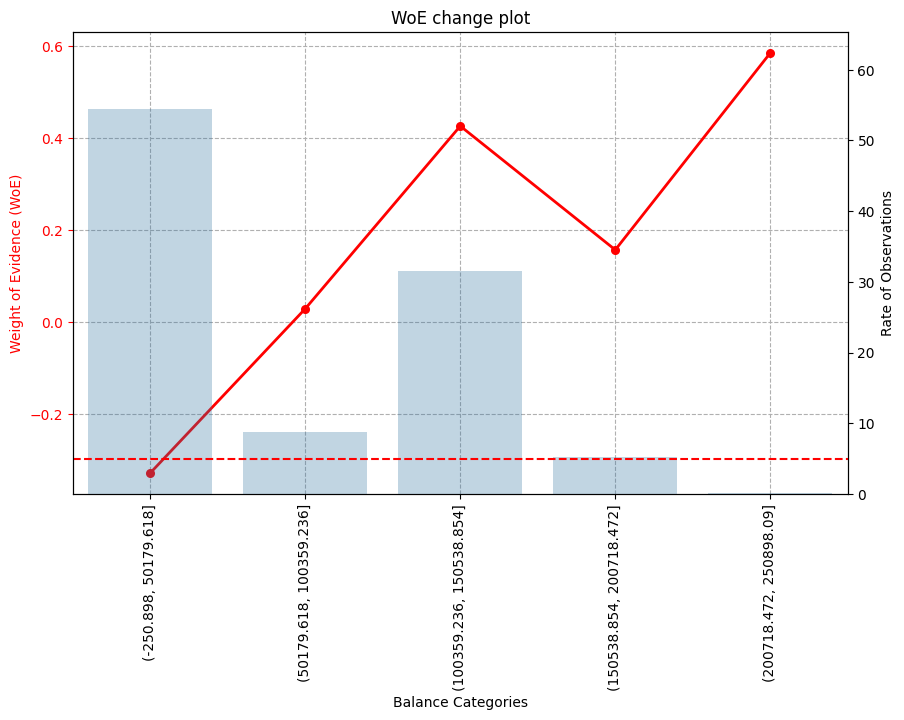

In [ ]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='Balance_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('Balance Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='Balance_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

In [ ]:
# -np.inf(), -251, 10000, 100000, 150000, 251000 np.inf()

In [ ]:
# -np.inf(), 340, 536, 659, 687, 721, 750, 851 np.inf()

In [ ]:
df3['Balance_Cat'] = pd.cut(df3['Balance'], bins=[-251, 10000, 105000, 145000, 251000])
ordinal_encoder = OrdinalEncoder()
df3['Balance_Cat'] = ordinal_encoder.fit_transform(df3[['Balance_Cat']])
df3.head()

In [ ]:
# df['Age_Cat'] = pd.qcut(df['Age'], q=10)
df3['Balance_Cat'] = pd.cut(df3['Balance'], bins=[-251, 10000, 105000, 145000, 251000])
df_woe = WoE_v2(df3, 'Balance_Cat', 'Exited')
df_woe

C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


Exited,Balance_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(-251, 10000]",75160,14494,0.415051,0.577652,-0.330569,89654,54.325
1,"(10000, 105000]",14280,4426,0.126743,0.109751,0.143951,18706,11.335
2,"(105000, 145000]",31642,13107,0.375333,0.243189,0.433976,44749,27.115
3,"(145000, 251000]",9031,2894,0.082873,0.069409,0.177291,11925,7.226


Exited,Balance_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(-251, 10000]",75160,14494,0.415051,0.577652,-0.330569,89654,54.325
1,"(10000, 105000]",14280,4426,0.126743,0.109751,0.143951,18706,11.335
2,"(105000, 145000]",31642,13107,0.375333,0.243189,0.433976,44749,27.115
3,"(145000, 251000]",9031,2894,0.082873,0.069409,0.177291,11925,7.226


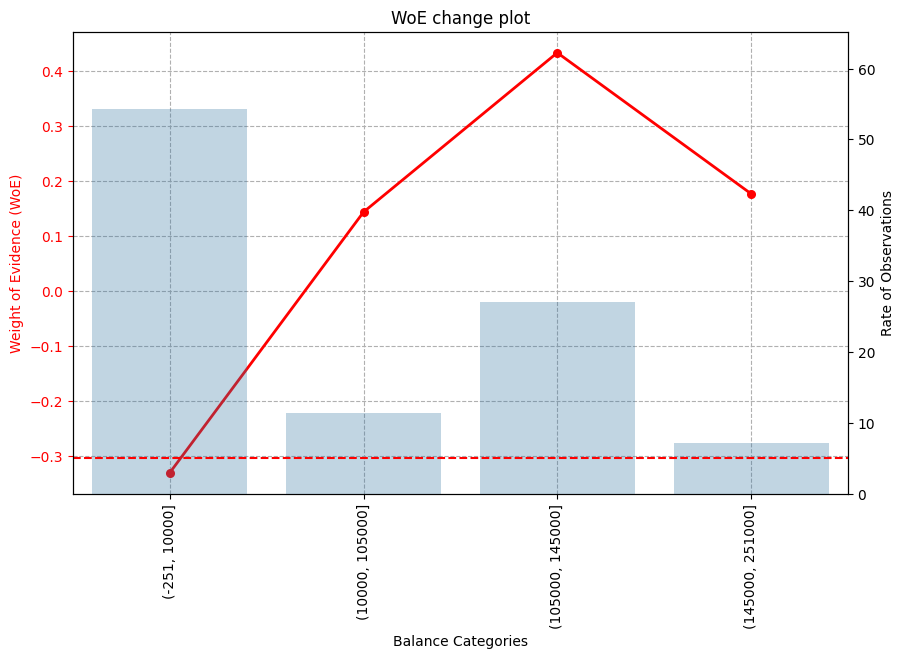

In [ ]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='Balance_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('Balance Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='Balance_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

### EstimatedSalary_Cat

In [ ]:
df1["EstimatedSalary"].value_counts()

EstimatedSalary
88890.05     178
140941.47    107
167984.72    100
90876.95      98
129964.94     98
            ... 
138875.86      1
176747.66      1
167558.27      1
5962.50        1
47941.84       1
Name: count, Length: 55298, dtype: int64

In [ ]:
df1.groupby("EstimatedSalary")["Exited"].count().sort_values()


EstimatedSalary
199894.34      1
199894.68      1
199953.80      1
199953.99      1
199970.74      1
            ... 
129964.94     98
90876.95      98
167984.72    100
140941.47    107
88890.05     178
Name: Exited, Length: 55298, dtype: int64

<Axes: >

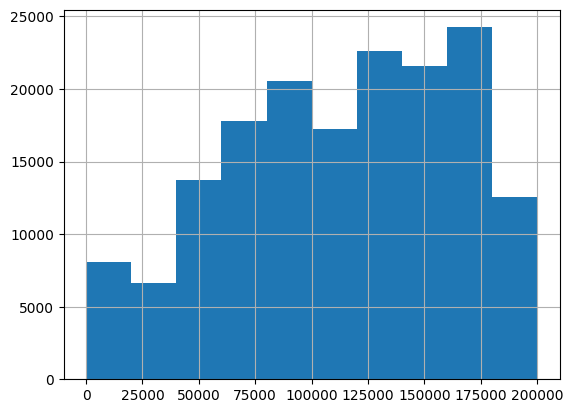

In [ ]:
df1["EstimatedSalary"].hist()

In [ ]:
df3 = df1.copy()
df3['EstimatedSalary_Cat'] = pd.qcut(df3['EstimatedSalary'], q=10)
# df3['EstimatedSalary_Cat'] = pd.cut(df3['EstimatedSalary'], bins=5)
df3

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,EstimatedSalary_Cat
id,,,,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,1.0,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.0,0.0,"(176843.53, 199992.48]"
1,15749177,Okwudiliolisa,627,France,1.0,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.0,0.0,"(44965.443, 64716.08]"
2,15694510,Hsueh,678,France,1.0,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.0,0.0,"(176843.53, 199992.48]"
3,15741417,Kao,581,France,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.0,0.0,"(83022.859, 98820.06]"
4,15766172,Chiemenam,716,Spain,1.0,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,1.0,"(11.579, 44965.443]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,0.0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.0,1.0,"(117948.0, 132468.222]"
165030,15665521,Okechukwu,792,France,1.0,35.0,3,0.00,1,0.0,0.0,131834.45,0,0.0,0.0,"(117948.0, 132468.222]"
165031,15664752,Hsia,565,France,1.0,31.0,5,0.00,1,1.0,1.0,127429.56,0,0.0,0.0,"(117948.0, 132468.222]"


In [ ]:
df_woe = WoE_v2(df3, 'EstimatedSalary_Cat', 'Exited')
df_woe

C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


Exited,EstimatedSalary_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(11.579, 44965.443]",13220,3284,0.094041,0.101604,-0.077354,16504,10.000
1,"(44965.443, 64716.08]",12906,3631,0.103978,0.099191,0.047131,16537,10.020
2,"(64716.08, 83022.859]",13247,3222,0.092265,0.101812,-0.098454,16469,9.979
3,"(83022.859, 98820.06]",13181,3325,0.095215,0.101304,-0.061992,16506,10.002
4,"(98820.06, 117948.0]",13113,3410,0.097649,0.100782,-0.031577,16523,10.012
5,"(117948.0, 132468.222]",13119,3362,0.096274,0.100828,-0.046211,16481,9.986
6,"(132468.222, 146700.28]",12951,3554,0.101773,0.099537,0.022216,16505,10.001
7,"(146700.28, 162922.65]",12970,3544,0.101486,0.099683,0.017932,16514,10.006
8,"(162922.65, 176843.53]",12658,3868,0.110764,0.097285,0.129763,16526,10.014
9,"(176843.53, 199992.48]",12748,3721,0.106555,0.097976,0.083933,16469,9.979


In [ ]:
df3['EstimatedSalary_Cat'].value_counts(normalize=True).sort_index()*100

EstimatedSalary_Cat
(11.579, 44965.443]        10.000364
(44965.443, 64716.08]      10.020359
(64716.08, 83022.859]       9.979156
(83022.859, 98820.06]      10.001575
(98820.06, 117948.0]       10.011876
(117948.0, 132468.222]      9.986427
(132468.222, 146700.28]    10.000969
(146700.28, 162922.65]     10.006423
(162922.65, 176843.53]     10.013694
(176843.53, 199992.48]      9.979156
Name: proportion, dtype: float64

Exited,EstimatedSalary_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(11.579, 44965.443]",13220,3284,0.094041,0.101604,-0.077354,16504,10.000
1,"(44965.443, 64716.08]",12906,3631,0.103978,0.099191,0.047131,16537,10.020
2,"(64716.08, 83022.859]",13247,3222,0.092265,0.101812,-0.098454,16469,9.979
3,"(83022.859, 98820.06]",13181,3325,0.095215,0.101304,-0.061992,16506,10.002
4,"(98820.06, 117948.0]",13113,3410,0.097649,0.100782,-0.031577,16523,10.012
5,"(117948.0, 132468.222]",13119,3362,0.096274,0.100828,-0.046211,16481,9.986
6,"(132468.222, 146700.28]",12951,3554,0.101773,0.099537,0.022216,16505,10.001
7,"(146700.28, 162922.65]",12970,3544,0.101486,0.099683,0.017932,16514,10.006
8,"(162922.65, 176843.53]",12658,3868,0.110764,0.097285,0.129763,16526,10.014
9,"(176843.53, 199992.48]",12748,3721,0.106555,0.097976,0.083933,16469,9.979


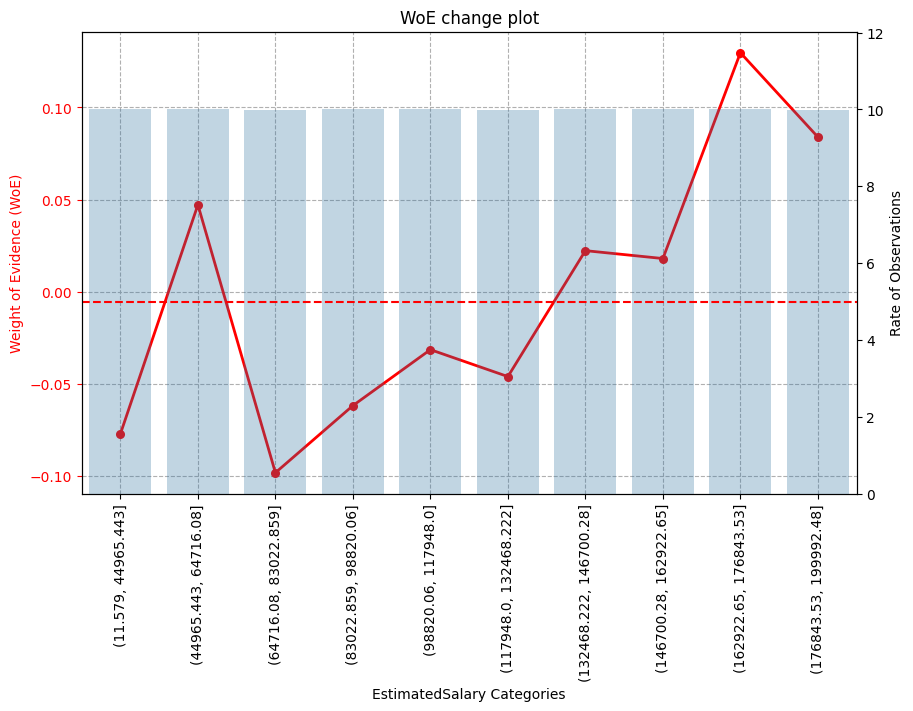

In [ ]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='EstimatedSalary_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('EstimatedSalary Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='EstimatedSalary_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

In [ ]:
# -np.inf(), 11, 45000, 65000, 99000, 133000, 163000, 200000 np.inf()

In [ ]:
# -np.inf(), 340, 536, 659, 687, 721, 750, 851 np.inf()

In [ ]:
# df['Age_Cat'] = pd.qcut(df['Age'], q=10)
df3['EstimatedSalary_Cat'] = pd.cut(df3['EstimatedSalary'], bins=[11, 33000, 60000, 99000, 133000, 163000, 200000])
df_woe = WoE_v2(df3, 'EstimatedSalary_Cat', 'Exited')
df_woe

C:\Users\Rudy\AppData\Local\Temp\ipykernel_22480\3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


Exited,EstimatedSalary_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(11, 33000]",9810,2596,0.074339,0.075396,-0.014116,12406,7.517
1,"(33000, 60000]",12710,3321,0.095100,0.097684,-0.026808,16031,9.714
2,"(60000, 99000]",30207,7579,0.217033,0.232160,-0.067377,37786,22.896
3,"(99000, 133000]",26706,6930,0.198448,0.205252,-0.033714,33636,20.381
4,"(133000, 163000]",25362,6937,0.198648,0.194923,0.018932,32299,19.571
5,"(163000, 200000]",25318,7558,0.216431,0.194585,0.106406,32876,19.921


Exited,EstimatedSalary_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(11, 33000]",9810,2596,0.074339,0.075396,-0.014116,12406,7.517
1,"(33000, 60000]",12710,3321,0.095100,0.097684,-0.026808,16031,9.714
2,"(60000, 99000]",30207,7579,0.217033,0.232160,-0.067377,37786,22.896
3,"(99000, 133000]",26706,6930,0.198448,0.205252,-0.033714,33636,20.381
4,"(133000, 163000]",25362,6937,0.198648,0.194923,0.018932,32299,19.571
5,"(163000, 200000]",25318,7558,0.216431,0.194585,0.106406,32876,19.921


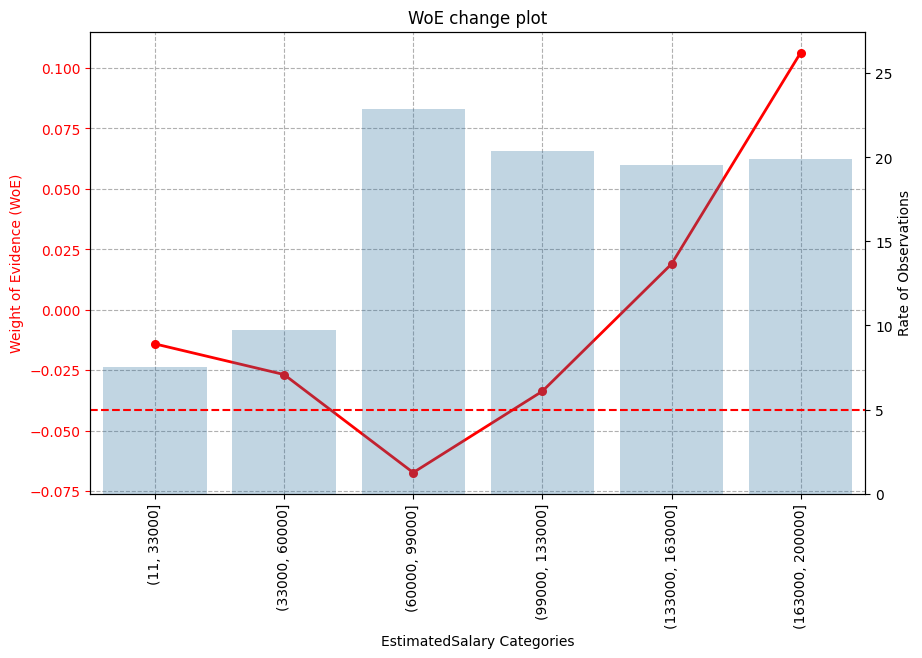

In [ ]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='EstimatedSalary_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('EstimatedSalary Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='EstimatedSalary_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

# Create new features

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
geography_encoded = encoder.fit_transform(df1[['Geography']])
geography_encoded_df = pd.DataFrame(geography_encoded, columns=encoder.get_feature_names_out(['Geography']))
df1 = pd.concat([df1, geography_encoded_df], axis=1)
df1.drop('Geography', axis=1, inplace=True)
encoder = OneHotEncoder(sparse_output=False)
gender_encoded = encoder.fit_transform(df1[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))
df1 = pd.concat([df1, gender_encoded_df], axis=1)
df1.drop('Gender', axis=1, inplace=True)
df1


df3 = df1.copy()
df3['Age_Cat'] = pd.cut(df3['Age'], bins=[-1, 34, 37, 39, 41, 43, 46, 53, 93])
ordinal_encoder = OrdinalEncoder()
df3['Age_Cat'] = ordinal_encoder.fit_transform(df3[['Age_Cat']])
df3.head()

df3['Balance_Cat'] = pd.cut(df3['Balance'], bins=[-251, 10000, 105000, 145000, 251000])
ordinal_encoder = OrdinalEncoder()
df3['Balance_Cat'] = ordinal_encoder.fit_transform(df3[['Balance_Cat']])
df3.head()

df3['EstimatedSalary_Cat'] = pd.cut(df3['EstimatedSalary'], bins=[11, 33000, 60000, 99000, 133000, 163000, 200000])
ordinal_encoder = OrdinalEncoder()
df3['EstimatedSalary_Cat'] = ordinal_encoder.fit_transform(df3[['EstimatedSalary_Cat']])
df3.head()

df1 = df3.copy()

df1['BalanceSalaryRatio'] = df1['Balance'] / df1['EstimatedSalary']
df1['TenureAgeRatio'] = df1['Tenure'] / df1['Age']
df1['IsActive_by_CreditCard'] = df1['HasCrCard'] * df1['IsActiveMember']
df1['IsSenior'] = (df1['Age'] > 70).astype(float)
df1['IsBalanceZero'] = (df1['Balance'] == 0.0).astype(float)
df1.head()

df1['Log_Balance'] = np.log1p(df1['Balance'])
df1['Log_EstimatedSalary'] = np.log1p(df1['EstimatedSalary'])
df1.head()

In [594]:
df3 = df1.copy()
df3['Age_Cat'] = pd.cut(df3['Age'], bins=[-1, 34, 37, 39, 41, 43, 46, 53, 93])
ordinal_encoder = OrdinalEncoder()
df3['Age_Cat'] = ordinal_encoder.fit_transform(df3[['Age_Cat']])
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_Cat
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,0.0,0.0,0.0,1.0,0.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,0.0,0.0,0.0,1.0,0.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,0.0,0.0,0.0,1.0,3.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,0.0,0.0,0.0,1.0,0.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,0.0,1.0,0.0,1.0,0.0


In [595]:
df3['Balance_Cat'] = pd.cut(df3['Balance'], bins=[-251, 10000, 105000, 145000, 251000])
ordinal_encoder = OrdinalEncoder()
df3['Balance_Cat'] = ordinal_encoder.fit_transform(df3[['Balance_Cat']])
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_Cat,Balance_Cat
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,0.0,0.0,0.0,1.0,3.0,0.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [596]:
df3['EstimatedSalary_Cat'] = pd.cut(df3['EstimatedSalary'], bins=[11, 33000, 60000, 99000, 133000, 163000, 200000])
ordinal_encoder = OrdinalEncoder()
df3['EstimatedSalary_Cat'] = ordinal_encoder.fit_transform(df3[['EstimatedSalary_Cat']])
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_Cat,Balance_Cat,EstimatedSalary_Cat
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,5.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [597]:
df1 = df3.copy()

In [598]:
df1['BalanceSalaryRatio'] = df1['Balance'] / df1['EstimatedSalary']
df1['TenureAgeRatio'] = df1['Tenure'] / df1['Age']
df1['IsActive_by_CreditCard'] = df1['HasCrCard'] * df1['IsActiveMember']
df1['IsSenior'] = (df1['Age'] > 70).astype(float)
df1['IsBalanceZero'] = (df1['Balance'] == 0.0).astype(float)
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,...,Gender_Female,Gender_Male,Age_Cat,Balance_Cat,EstimatedSalary_Cat,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,IsSenior,IsBalanceZero
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,...,0.0,1.0,0.0,0.0,5.0,0.000000,0.090909,0.0,0.0,1.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.000000,0.030303,1.0,0.0,1.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,...,0.0,1.0,3.0,0.0,5.0,0.000000,0.250000,0.0,0.0,1.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,...,0.0,1.0,0.0,3.0,2.0,1.760655,0.058824,1.0,0.0,0.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.151515,1.0,0.0,1.0


In [608]:
df1['Log_Balance'] = np.log1p(df1['Balance'])
df1['Log_EstimatedSalary'] = np.log1p(df1['EstimatedSalary'])
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,...,Age_Cat,Balance_Cat,EstimatedSalary_Cat,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,IsSenior,IsBalanceZero,Log_Balance,Log_EstimatedSalary
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,...,0.0,0.0,5.0,0.000000,0.090909,0.0,0.0,1.0,0.00000,12.108741
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,...,0.0,0.0,1.0,0.000000,0.030303,1.0,0.0,1.0,0.00000,10.809819
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,...,3.0,0.0,5.0,0.000000,0.250000,0.0,0.0,1.0,0.00000,12.127396
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,...,0.0,3.0,2.0,1.760655,0.058824,1.0,0.0,0.0,11.91092,11.345239
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,...,0.0,0.0,0.0,0.000000,0.151515,1.0,0.0,1.0,0.00000,9.620450


In [599]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,...,Gender_Female,Gender_Male,Age_Cat,Balance_Cat,EstimatedSalary_Cat,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,IsSenior,IsBalanceZero
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,...,0.0,1.0,0.0,0.0,5.0,0.000000,0.090909,0.0,0.0,1.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.000000,0.030303,1.0,0.0,1.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,...,0.0,1.0,3.0,0.0,5.0,0.000000,0.250000,0.0,0.0,1.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,...,0.0,1.0,0.0,3.0,2.0,1.760655,0.058824,1.0,0.0,0.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.151515,1.0,0.0,1.0


In [609]:
phik_overview = df1.phik_matrix()
phik_overview

interval columns not set, guessing: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Age_Cat', 'Balance_Cat', 'EstimatedSalary_Cat', 'BalanceSalaryRatio', 'TenureAgeRatio', 'IsActive_by_CreditCard', 'IsSenior', 'IsBalanceZero', 'Log_Balance', 'Log_EstimatedSalary']


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,...,Age_Cat,Balance_Cat,EstimatedSalary_Cat,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,IsSenior,IsBalanceZero,Log_Balance,Log_EstimatedSalary
CreditScore,1.000000,0.036682,0.025602,0.047226,0.026432,0.037978,0.017597,0.047575,0.048878,0.031572,...,0.026514,0.034632,0.036559,0.009368,0.016100,0.021479,0.011382,0.041683,0.030785,0.030754
Age,0.036682,1.000000,0.031975,0.098470,0.200044,0.024230,0.138154,0.048027,0.522176,0.107219,...,0.859831,0.084170,0.030056,0.008416,0.536527,0.113408,0.997039,0.110051,0.073355,0.023269
Tenure,0.025602,0.031975,1.000000,0.040565,0.041007,0.015240,0.021020,0.025463,0.049471,0.021494,...,0.023598,0.030405,0.013454,0.002865,0.874663,0.014277,0.009800,0.038641,0.026304,0.007773
Balance,0.047226,0.098470,0.040565,1.000000,0.397276,0.036134,0.022163,0.056976,0.188914,0.456232,...,0.071811,0.964045,0.026904,0.010961,0.039325,0.032065,0.009363,1.000000,0.809001,0.025435
NumOfProducts,0.026432,0.200044,0.041007,0.397276,1.000000,0.020353,0.126573,0.025962,0.607504,0.143248,...,0.268821,0.561160,0.011070,0.000000,0.066103,0.110896,0.004573,0.616709,0.370772,0.014186
HasCrCard,0.037978,0.024230,0.015240,0.036134,0.020353,1.000000,0.032766,0.018833,0.034528,0.024396,...,0.024139,0.040921,0.014714,0.000000,0.013869,0.635565,0.003184,0.033174,0.028816,0.010512
IsActiveMember,0.017597,0.138154,0.021020,0.022163,0.126573,0.032766,1.000000,0.020149,0.324254,0.027775,...,0.131534,0.025050,0.009924,0.002296,0.020623,0.936014,0.073523,0.023496,0.021781,0.011028
EstimatedSalary,0.047575,0.048027,0.025463,0.056976,0.025962,0.018833,0.020149,1.000000,0.033950,0.012803,...,0.030041,0.041740,0.972288,0.038712,0.027928,0.021762,0.011307,0.045565,0.032418,0.772297
Exited,0.048878,0.522176,0.049471,0.188914,0.607504,0.034528,0.324254,0.033950,1.000000,0.203724,...,0.541613,0.211266,0.033947,0.000000,0.178341,0.276473,0.016050,0.207770,0.185320,0.008534
Geography_France,0.031572,0.107219,0.021494,0.456232,0.143248,0.024396,0.027775,0.012803,0.203724,1.000000,...,0.108956,0.513472,0.011895,0.009137,0.031179,0.036509,0.004078,0.515902,0.479537,0.010983


c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
c:\Python\Lib\site-packages\sklearn\linear_mo

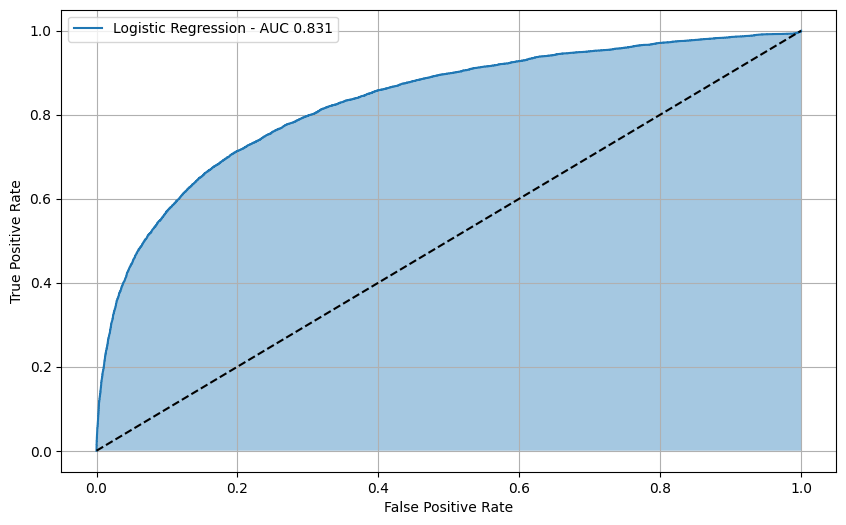

Optimal threshold: 0.20964591641978028


In [611]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier

# Define target variable
y = df1['Exited']

# Drop the columns you don't want in your features
X = df1.drop(columns=["Exited", "Age", "Balance", "EstimatedSalary", "BalanceSalaryRatio"])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

estimators = [
    ('lr_l1', LogisticRegression(penalty='l1', solver='liblinear', C=0.5, max_iter=500, n_jobs=4)),
    ('lr_l2', LogisticRegression(penalty='l2', C=1.0, max_iter=500, n_jobs=4)),
    ('ridge', RidgeClassifier())
]

# Определяем стекинг-классификатор с логистической регрессией в качестве финальной модели
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(penalty='l2', C=1.0, max_iter=1000),
    cv=5  # Количество фолдов для кросс-валидации
)

# Обучаем стекинг-классификатор на обучающих данных
stacking_clf.fit(X_train, y_train)

# Делаем предсказания и оцениваем модель стекинга
y_score = stacking_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')  # Random classifier line

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(['Logistic Regression - AUC {:.3f}'.format(roc_auc_score(y_test, y_score))])

ax.fill_between(fpr, tpr, step="pre", alpha=0.4)
plt.grid()
plt.show()

# Calculate the optimal threshold using Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)  # Youden's J statistic
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold:", optimal_threshold)



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

# Определяем базовые модели
estimators = [
    ('lr_l1', LogisticRegression(penalty='l1', solver='liblinear', C=0.5)),
    ('lr_l2', LogisticRegression(penalty='l2', C=1.0)),
    ('ridge', RidgeClassifier())
]

# Определяем стекинг-классификатор с логистической регрессией в качестве финальной модели
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(penalty='l2', C=1.0),
    cv=5  # Количество фолдов для кросс-валидации
)

# Обучаем стекинг-классификатор на обучающих данных
stacking_clf.fit(X_train, y_train)

# Делаем предсказания и оцениваем модель стекинга
stacking_pred = stacking_clf.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, stacking_pred))


# Polynomial

In [270]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from phik import phik_matrix

df2 = df1.drop(["CustomerId", "Surname", "Geography", "Exited"], axis=1)
# 1. Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
df_poly = poly.fit_transform(df2)

# Преобразуем обратно в DataFrame для удобства
poly_feature_names = poly.get_feature_names_out(input_features=df2.columns)
df_poly = pd.DataFrame(df_poly, columns=poly_feature_names)
df_poly["Exited"] = df1["Exited"]
# 2. Вычисление матрицы Phik
# Укажите, какие колонки вы хотите использовать для анализа (если это необходимо)
# Например, если хотите использовать все столбцы:
intervals_cols = df_poly.columns.tolist()

phik_overview = df_poly.phik_matrix(interval_cols=intervals_cols)

# Выводим матрицу Phik
phik_overview



c:\Python\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable Germany Spain for analysis 1. Dropping this column
  warnings.warn(


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,...,IsActiveMember^2,IsActiveMember EstimatedSalary,IsActiveMember Germany,IsActiveMember Spain,EstimatedSalary^2,EstimatedSalary Germany,EstimatedSalary Spain,Germany^2,Spain^2,Exited
CreditScore,1.000000,0.008456,0.036709,0.025608,0.047280,0.026427,0.037877,0.017424,0.047571,0.026928,...,0.017424,0.034879,0.016498,0.011588,0.046947,0.033332,0.027670,0.026928,0.013454,0.048688
Gender,0.008456,1.000000,0.100415,0.011293,0.024131,0.086019,0.009287,0.052786,0.020706,0.061808,...,0.052786,0.046790,0.011671,0.021627,0.027965,0.050148,0.013832,0.061808,0.011071,0.227953
Age,0.036709,0.100415,1.000000,0.031983,0.098499,0.199934,0.023919,0.138147,0.047875,0.155993,...,0.138147,0.115503,0.060015,0.062383,0.045046,0.127484,0.039055,0.155993,0.030382,0.521917
Tenure,0.025608,0.011293,0.031983,1.000000,0.040571,0.041085,0.015180,0.021014,0.025769,0.028354,...,0.021014,0.023568,0.018214,0.010803,0.019241,0.024670,0.020010,0.028354,0.014937,0.049479
Balance,0.047280,0.024131,0.098499,0.040571,1.000000,0.397316,0.036160,0.022327,0.057123,0.726642,...,0.022327,0.045515,0.469714,0.117154,0.046503,0.525292,0.147952,0.726642,0.183248,0.189029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EstimatedSalary Germany,0.033332,0.050148,0.127484,0.024670,0.525292,0.138470,0.008432,0.047367,0.858924,0.999027,...,0.047367,0.703255,0.781674,0.232011,0.752895,1.000000,0.267965,0.999027,0.345898,0.269489
EstimatedSalary Spain,0.027670,0.013832,0.039055,0.020010,0.147952,0.031899,0.015899,0.018948,0.866406,0.343495,...,0.018948,0.751073,0.218552,0.811943,0.758928,0.267965,1.000000,0.343495,0.998496,0.064999
Germany^2,0.026928,0.061808,0.155993,0.028354,0.726642,0.223957,0.006784,0.057044,0.032657,1.000000,...,0.057044,0.045484,0.841046,0.283658,0.026247,0.999027,0.343495,1.000000,0.415915,0.325437
Spain^2,0.013454,0.011071,0.030382,0.014937,0.183248,0.050209,0.021679,0.022378,0.026114,0.415915,...,0.022378,0.019845,0.269464,0.869053,0.016171,0.345898,0.998496,0.415915,1.000000,0.080181


In [271]:
phik_overview[phik_overview[['Exited']] >= 0.05][["Exited"]].dropna()

,Exited
Gender,0.227953
Age,0.521917
Balance,0.189029
NumOfProducts,0.607392
IsActiveMember,0.324228
Germany,0.325437
Spain,0.080181
CreditScore Gender,0.138320
CreditScore Age,0.407668
CreditScore Balance,0.178169


In [284]:
len(phik_overview[phik_overview[['Exited']] >= 0.1][["Exited"]].dropna().T.columns)

53

In [266]:
phik_overview[phik_overview['Exited'] >= 0.05].index.tolist()

['Gender',
 'Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'Exited',
 'Germany',
 'Spain',
 'CreditScore Gender',
 'CreditScore Age',
 'CreditScore Balance',
 'CreditScore NumOfProducts',
 'CreditScore IsActiveMember',
 'CreditScore Exited',
 'CreditScore Germany',
 'Gender^2',
 'Gender Age',
 'Gender Tenure',
 'Gender NumOfProducts',
 'Gender HasCrCard',
 'Gender IsActiveMember',
 'Gender EstimatedSalary',
 'Gender Exited',
 'Gender Germany',
 'Gender Spain',
 'Age^2',
 'Age Tenure',
 'Age Balance',
 'Age NumOfProducts',
 'Age HasCrCard',
 'Age IsActiveMember',
 'Age EstimatedSalary',
 'Age Exited',
 'Age Germany',
 'Age Spain',
 'Tenure Balance',
 'Tenure NumOfProducts',
 'Tenure HasCrCard',
 'Tenure IsActiveMember',
 'Tenure Exited',
 'Tenure Germany',
 'Tenure Spain',
 'Balance^2',
 'Balance NumOfProducts',
 'Balance HasCrCard',
 'Balance IsActiveMember',
 'Balance EstimatedSalary',
 'Balance Exited',
 'Balance Germany',
 'NumOfProducts^2',
 'NumOfProducts HasCrCard',
 'N

In [273]:
# Получаем названия признаков с корреляцией с 'Exited' >= 0.05
significant_features = phik_overview[phik_overview['Exited'] >= 0.05].index.tolist()

# Фильтруем DataFrame df по значимым признакам
filtered_df = df_poly[significant_features]

# Выводим отфильтрованный DataFrame
filtered_df


,Gender,Age,Balance,NumOfProducts,IsActiveMember,Germany,Spain,CreditScore Gender,CreditScore Age,CreditScore Balance,...,HasCrCard Germany,HasCrCard Spain,IsActiveMember^2,IsActiveMember EstimatedSalary,IsActiveMember Spain,EstimatedSalary Germany,EstimatedSalary Spain,Germany^2,Spain^2,Exited
0,1.0,33.0,0.00,2.0,0.0,0.0,0.0,668.0,22044.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0
1,1.0,33.0,0.00,2.0,1.0,0.0,0.0,627.0,20691.0,0.00,...,0.0,0.0,1.0,49503.50,0.0,0.0,0.00,0.0,0.0,0
2,1.0,40.0,0.00,2.0,0.0,0.0,0.0,678.0,27120.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0
3,1.0,34.0,148882.54,1.0,1.0,0.0,0.0,581.0,19754.0,86500755.74,...,0.0,0.0,1.0,84560.88,0.0,0.0,0.00,0.0,0.0,0
4,1.0,33.0,0.00,2.0,1.0,0.0,1.0,716.0,23628.0,0.00,...,0.0,1.0,1.0,15068.83,1.0,0.0,15068.83,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.0,33.0,0.00,1.0,1.0,0.0,1.0,0.0,22011.0,0.00,...,0.0,1.0,1.0,131834.75,1.0,0.0,131834.75,0.0,1.0,0
165030,1.0,35.0,0.00,1.0,0.0,0.0,0.0,792.0,27720.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0
165031,1.0,31.0,0.00,1.0,1.0,0.0,0.0,565.0,17515.0,0.00,...,0.0,0.0,1.0,127429.56,0.0,0.0,0.00,0.0,0.0,0
165032,0.0,30.0,161533.00,1.0,1.0,0.0,1.0,0.0,16620.0,89489282.00,...,0.0,0.0,1.0,71173.03,1.0,0.0,71173.03,0.0,1.0,0


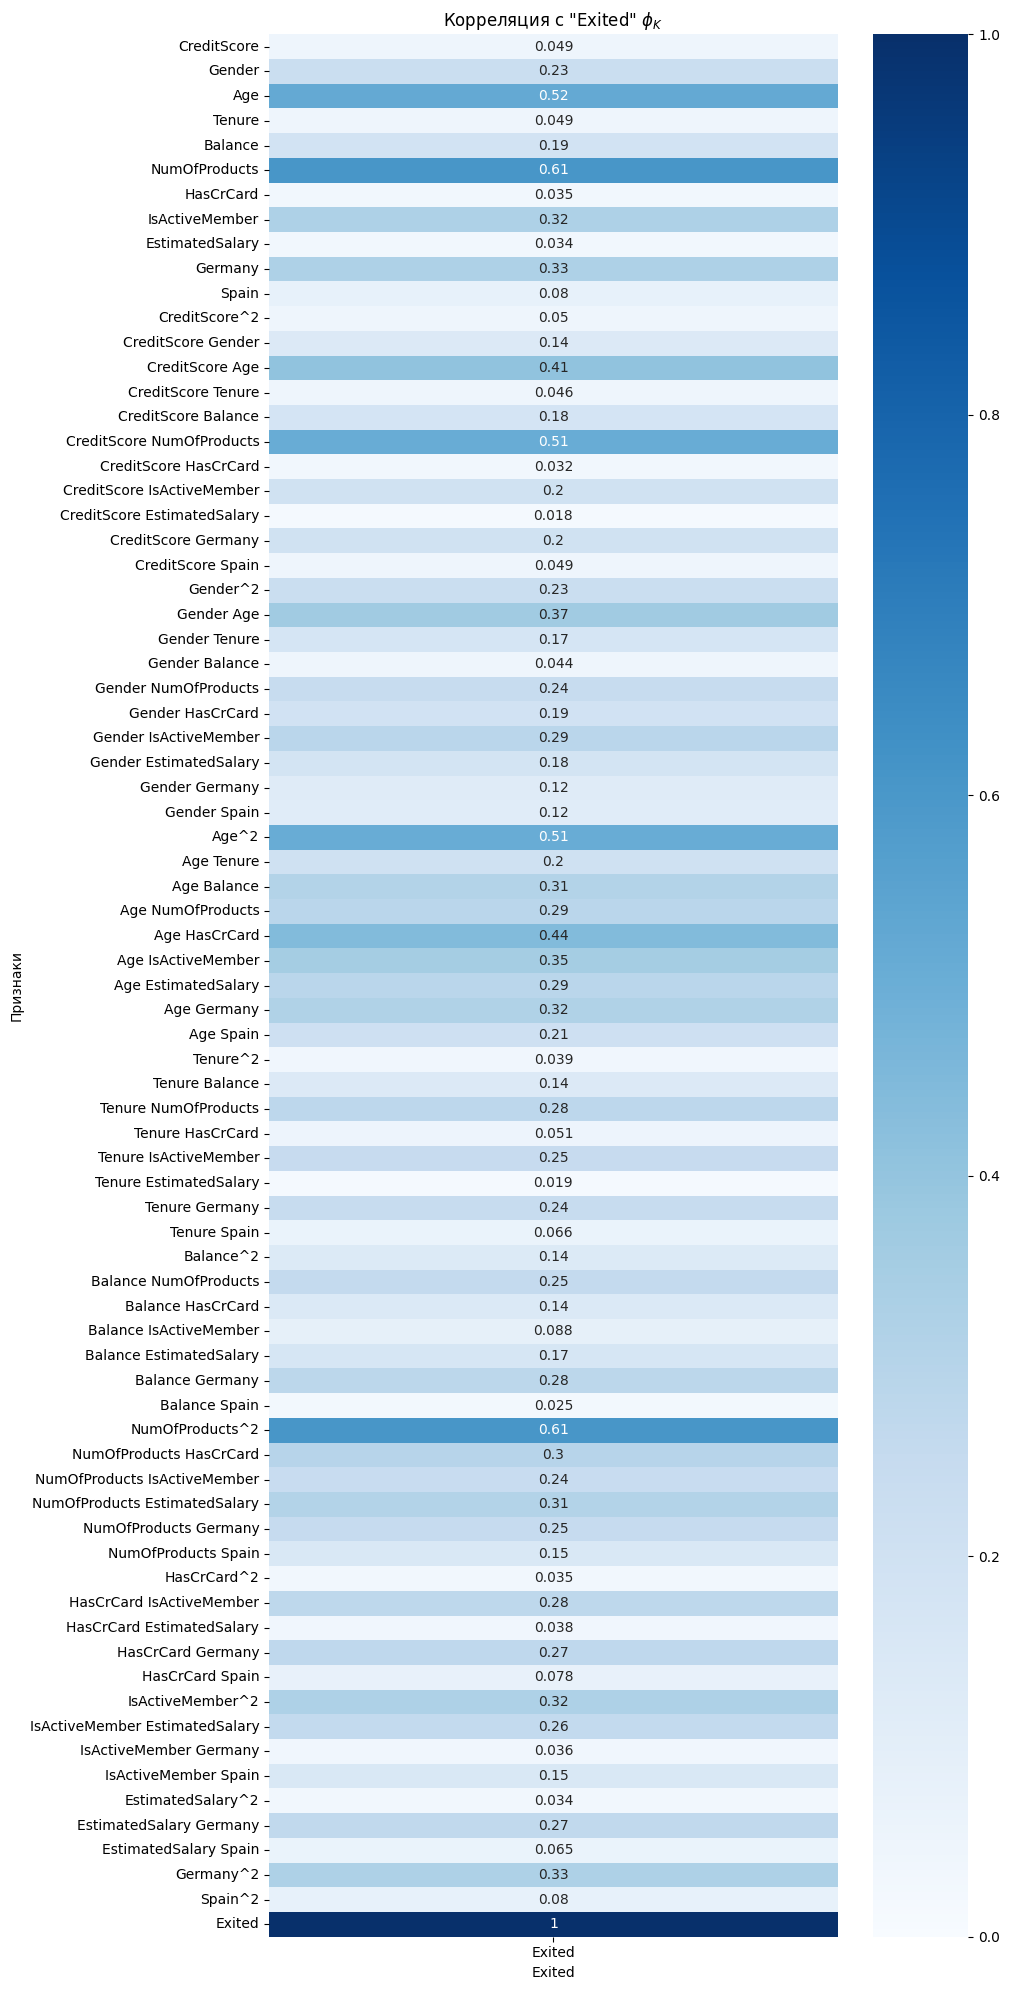

In [274]:
phik_exited = phik_overview[['Exited']]

# Построение тепловой карты
plt.figure(figsize=(10, 20))
sns.heatmap(phik_exited, annot=True, cmap='Blues', vmin=0, vmax=1,
            xticklabels=phik_exited.columns, yticklabels=phik_exited.index)
plt.title(r'Корреляция с "Exited" $\phi_K$')
plt.xlabel('Exited')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()

# ROC AUC for poly

In [285]:
# Получаем названия признаков с корреляцией с 'Exited' >= 0.05
significant_features = phik_overview[phik_overview['Exited'] >= 0.1].index.tolist()

# Фильтруем DataFrame df по значимым признакам
filtered_df = df_poly[significant_features]

# Выводим отфильтрованный DataFrame
filtered_df

,Gender,Age,Balance,NumOfProducts,IsActiveMember,Germany,CreditScore Gender,CreditScore Age,CreditScore Balance,CreditScore NumOfProducts,...,NumOfProducts Germany,NumOfProducts Spain,HasCrCard IsActiveMember,HasCrCard Germany,IsActiveMember^2,IsActiveMember EstimatedSalary,IsActiveMember Spain,EstimatedSalary Germany,Germany^2,Exited
0,1.0,33.0,0.00,2.0,0.0,0.0,668.0,22044.0,0.00,1336.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
1,1.0,33.0,0.00,2.0,1.0,0.0,627.0,20691.0,0.00,1254.0,...,0.0,0.0,1.0,0.0,1.0,49503.50,0.0,0.0,0.0,0
2,1.0,40.0,0.00,2.0,0.0,0.0,678.0,27120.0,0.00,1356.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
3,1.0,34.0,148882.54,1.0,1.0,0.0,581.0,19754.0,86500755.74,581.0,...,0.0,0.0,1.0,0.0,1.0,84560.88,0.0,0.0,0.0,0
4,1.0,33.0,0.00,2.0,1.0,0.0,716.0,23628.0,0.00,1432.0,...,0.0,2.0,1.0,0.0,1.0,15068.83,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.0,33.0,0.00,1.0,1.0,0.0,0.0,22011.0,0.00,667.0,...,0.0,1.0,1.0,0.0,1.0,131834.75,1.0,0.0,0.0,0
165030,1.0,35.0,0.00,1.0,0.0,0.0,792.0,27720.0,0.00,792.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
165031,1.0,31.0,0.00,1.0,1.0,0.0,565.0,17515.0,0.00,565.0,...,0.0,0.0,1.0,0.0,1.0,127429.56,0.0,0.0,0.0,0
165032,0.0,30.0,161533.00,1.0,1.0,0.0,0.0,16620.0,89489282.00,554.0,...,0.0,1.0,0.0,0.0,1.0,71173.03,1.0,0.0,0.0,0


c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:

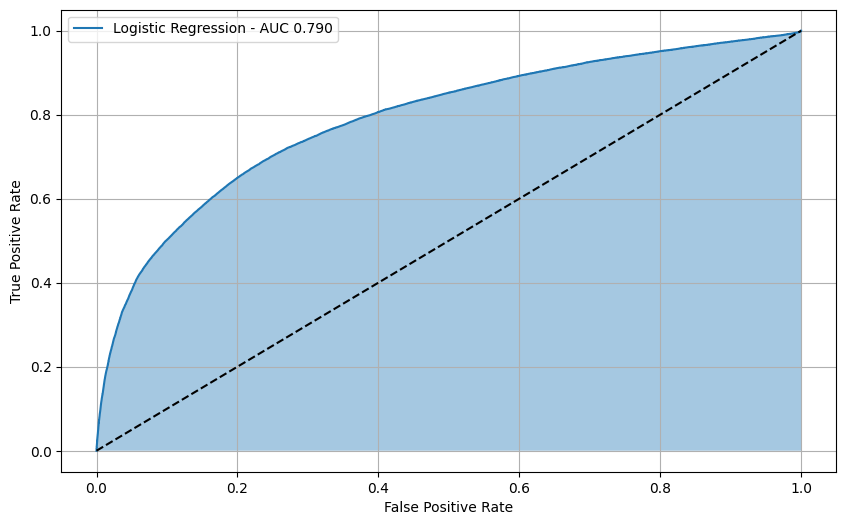

Optimal threshold: 0.2907150196166013


In [286]:
# Define target variable
y = filtered_df['Exited']

# Drop the columns you don't want in your features
X = filtered_df.drop(columns=["Exited"])

# Define logistic regression model
model = LogisticRegression(max_iter=2000)

# Set up stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validated predictions
y_prob = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = roc_auc_score(y, y_prob)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')  # Random classifier line

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(['Logistic Regression - AUC {:.3f}'.format(roc_auc)])

ax.fill_between(fpr, tpr, step="pre", alpha=0.4)
plt.grid()
plt.show()

# Calculate the optimal threshold using Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)  # Youden's J statistic
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold:", optimal_threshold)


# Test data

In [612]:
df_train=df1.copy()
df_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,...,Age_Cat,Balance_Cat,EstimatedSalary_Cat,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,IsSenior,IsBalanceZero,Log_Balance,Log_EstimatedSalary
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,...,0.0,0.0,5.0,0.000000,0.090909,0.0,0.0,1.0,0.000000,12.108741
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,...,0.0,0.0,1.0,0.000000,0.030303,1.0,0.0,1.0,0.000000,10.809819
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,...,3.0,0.0,5.0,0.000000,0.250000,0.0,0.0,1.0,0.000000,12.127396
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,...,0.0,3.0,2.0,1.760655,0.058824,1.0,0.0,0.0,11.910920,11.345239
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,...,0.0,0.0,0.0,0.000000,0.151515,1.0,0.0,1.0,0.000000,9.620450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.0,...,0.0,0.0,3.0,0.000000,0.060606,1.0,0.0,1.0,0.000000,11.789312
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1.0,...,1.0,0.0,3.0,0.000000,0.085714,0.0,0.0,1.0,0.000000,11.789310
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1.0,...,0.0,0.0,3.0,0.000000,0.161290,1.0,0.0,1.0,0.000000,11.755327
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0.0,...,0.0,3.0,2.0,2.269582,0.233333,0.0,0.0,0.0,11.992471,11.172883


In [674]:
df_test = pd.read_csv("test.csv", index_col = 0)
df_test

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...
275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38


In [691]:
df5 = df_test.copy()

In [692]:
df5

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...
275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38


In [693]:
df5["Gender"].value_counts()

Gender
Male      61942
Female    48081
Name: count, dtype: int64

In [694]:
df5 = df5.drop(['CustomerId', "Surname"], axis=1)
df5

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
165034,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...
275052,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
275053,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
275054,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38


In [695]:
df_test["Geography"].value_counts()

Geography
France     63171
Spain      23913
Germany    22939
Name: count, dtype: int64

In [696]:
encoder1 = OneHotEncoder(sparse_output=False)

# Кодирование столбца Geography
geography_encoded = encoder1.fit_transform(df5[['Geography']])

# Преобразование в DataFrame
geography_encoded_df = pd.DataFrame(geography_encoded, columns=encoder1.get_feature_names_out(['Geography']))

# Объединение с исходным DataFrame (по столбцам, не строкам)
df5 = pd.concat([df5.reset_index(drop=True), geography_encoded_df.reset_index(drop=True)], axis=1)

# Удаление исходного столбца Geography
df5.drop('Geography', axis=1, inplace=True)

In [699]:
df5.shape[0]

110023

In [701]:
df1 = df5.copy()

In [702]:
encoder = OneHotEncoder(sparse_output=False)
gender_encoded = encoder.fit_transform(df1[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))
df1 = pd.concat([df1.reset_index(drop=True), gender_encoded_df.reset_index(drop=True)], axis=1)
df1.drop('Gender', axis=1, inplace=True)
df1



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,1.0,0.0,0.0,1.0,0.0
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,1.0,0.0,0.0,1.0,0.0
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,1.0,0.0,0.0,1.0,0.0
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,1.0,0.0,0.0,0.0,1.0
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,29.0,7,116099.82,1,1.0,1.0,148087.62,0.0,0.0,1.0,0.0,1.0
110019,575,36.0,4,178032.53,1,1.0,1.0,42181.68,1.0,0.0,0.0,1.0,0.0
110020,712,31.0,2,0.00,2,1.0,0.0,16287.38,1.0,0.0,0.0,0.0,1.0
110021,709,32.0,3,0.00,1,1.0,1.0,158816.58,1.0,0.0,0.0,1.0,0.0


In [703]:

df3 = df1.copy()
df3['Age_Cat'] = pd.cut(df3['Age'], bins=[-1, 34, 37, 39, 41, 43, 46, 53, 93])
ordinal_encoder = OrdinalEncoder()
df3['Age_Cat'] = ordinal_encoder.fit_transform(df3[['Age_Cat']])
df3.head()

df3['Balance_Cat'] = pd.cut(df3['Balance'], bins=[-251, 10000, 105000, 145000, 251000])
ordinal_encoder = OrdinalEncoder()
df3['Balance_Cat'] = ordinal_encoder.fit_transform(df3[['Balance_Cat']])
df3.head()

df3['EstimatedSalary_Cat'] = pd.cut(df3['EstimatedSalary'], bins=[11, 33000, 60000, 99000, 133000, 163000, 200000])
ordinal_encoder = OrdinalEncoder()
df3['EstimatedSalary_Cat'] = ordinal_encoder.fit_transform(df3[['EstimatedSalary_Cat']])
df3.head()

df1 = df3.copy()

df1['BalanceSalaryRatio'] = df1['Balance'] / df1['EstimatedSalary']
df1['TenureAgeRatio'] = df1['Tenure'] / df1['Age']
df1['IsActive_by_CreditCard'] = df1['HasCrCard'] * df1['IsActiveMember']
df1['IsSenior'] = (df1['Age'] > 70).astype(float)
df1['IsBalanceZero'] = (df1['Balance'] == 0.0).astype(float)
df1.head()

df1['Log_Balance'] = np.log1p(df1['Balance'])
df1['Log_EstimatedSalary'] = np.log1p(df1['EstimatedSalary'])
df1.head()
df_test = df1.copy()

In [704]:
df_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,...,Age_Cat,Balance_Cat,EstimatedSalary_Cat,BalanceSalaryRatio,TenureAgeRatio,IsActive_by_CreditCard,IsSenior,IsBalanceZero,Log_Balance,Log_EstimatedSalary
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,1.0,0.0,...,0.0,0.0,4.0,0.000000,0.086957,0.0,0.0,1.0,0.000000,11.989021
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,1.0,0.0,...,5.0,0.0,2.0,0.000000,0.043478,0.0,0.0,1.0,0.000000,11.192035
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,1.0,0.0,...,0.0,0.0,4.0,0.000000,0.205882,0.0,0.0,1.0,0.000000,11.841388
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,1.0,0.0,...,1.0,0.0,3.0,0.000000,0.222222,0.0,0.0,1.0,0.000000,11.643362
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0.0,1.0,...,2.0,2.0,4.0,0.869703,0.263158,0.0,0.0,0.0,11.705730,11.845332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,29.0,7,116099.82,1,1.0,1.0,148087.62,0.0,0.0,...,0.0,2.0,4.0,0.783994,0.241379,1.0,0.0,0.0,11.662214,11.905566
110019,575,36.0,4,178032.53,1,1.0,1.0,42181.68,1.0,0.0,...,1.0,3.0,1.0,4.220613,0.111111,1.0,0.0,0.0,12.089727,10.649765
110020,712,31.0,2,0.00,2,1.0,0.0,16287.38,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.064516,0.0,0.0,1.0,0.000000,9.698207
110021,709,32.0,3,0.00,1,1.0,1.0,158816.58,1.0,0.0,...,0.0,0.0,4.0,0.000000,0.093750,1.0,0.0,1.0,0.000000,11.975512


In [705]:
df_test.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Age_Cat', 'Balance_Cat', 'EstimatedSalary_Cat', 'BalanceSalaryRatio',
       'TenureAgeRatio', 'IsActive_by_CreditCard', 'IsSenior', 'IsBalanceZero',
       'Log_Balance', 'Log_EstimatedSalary'],
      dtype='object')

In [706]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier

# Define target variable
y = df_train['Exited']

# Drop the columns you don't want in your features
X = df_train.drop(columns=["Exited", "Age", "Balance", "EstimatedSalary", "BalanceSalaryRatio"])
X_test = df_test.drop(columns=["Age", "Balance", "EstimatedSalary", "BalanceSalaryRatio"])

estimators = [
    ('lr_l1', LogisticRegression(penalty='l1', solver='liblinear', C=0.5, max_iter=500, n_jobs=4)),
    ('lr_l2', LogisticRegression(penalty='l2', C=1.0, max_iter=500, n_jobs=4)),
    ('ridge', RidgeClassifier())
]

# Определяем стекинг-классификатор с логистической регрессией в качестве финальной модели
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(penalty='l2', C=1.0, max_iter=1000),
    cv=5  # Количество фолдов для кросс-валидации
)

# Обучаем стекинг-классификатор на обучающих данных
stacking_clf.fit(X_train, y_train)

# Делаем предсказания и оцениваем модель стекинга
y_pred_test = stacking_clf.predict_proba(X_test)[:, 1]

c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
c:\Python\Lib\site-packages\sklearn\linear_mo

In [709]:
df_submission = pd.DataFrame(pd.read_csv("test.csv")["id"])
df_submission["Exited"] = y_pred_test
df_submission

,id,Exited
0,165034,0.054445
1,165035,0.706529
2,165036,0.087269
3,165037,0.136939
4,165038,0.367981
...,...,...
110018,275052,0.048117
110019,275053,0.080381
110020,275054,0.056969
110021,275055,0.074946


In [710]:
df_submission.to_csv("my_submission.csv", index=False)

In [ ]:
y = df1['Exited']
for i in df1.columns.tolist():
    if i == 'Exited':  
        continue
    X = df[[i]]
    X_train, X_test, y_train, y_test = train_test_split(    )
    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_score = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_score)

    y_prob = model.predict_proba(X)[:, 1]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(fpr, tpr)
    ax.plot([0, 0, 1], [0, 1, 1])

    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.legend(['LogisticRegression - AUC {:.3f}'.format(roc_auc_score(y, y_score))])
    ax.fill_between(fpr, tpr, step="pre", alpha=0.4)
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.legend(['LogisticRegression', 'Perfect classifier'])
    plt.grid()
    plt.show()
    plt.show()


    fpr, tpr, thresholds = roc_curve(y, y_prob)

    optimal_idx = np.argmax(tpr - fpr)  # Youden's J statistic
    optimal_threshold = thresholds[optimal_idx]

    print("Optimal threshold:", optimal_threshold)


In [370]:
df_test

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
id,,,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,0.0,23.0,2,0.00,2,0.0,1.0,160976.75,0.0,0.0
165035,15782418,Nott,683,France,0.0,46.0,2,0.00,1,1.0,0.0,72549.27,0.0,0.0
165036,15807120,K?,656,France,0.0,34.0,7,0.00,2,1.0,0.0,138882.09,0.0,0.0
165037,15808905,O'Donnell,681,France,1.0,36.0,8,0.00,1,1.0,0.0,113931.57,0.0,0.0
165038,15607314,Higgins,752,Germany,1.0,38.0,10,121263.62,1,1.0,0.0,139431.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275052,15662091,P'eng,570,Spain,1.0,29.0,7,116099.82,1,1.0,1.0,148087.62,0.0,1.0
275053,15774133,Cox,575,France,0.0,36.0,4,178032.53,1,1.0,1.0,42181.68,0.0,0.0
275054,15728456,Ch'iu,712,France,1.0,31.0,2,0.00,2,1.0,0.0,16287.38,0.0,0.0


<Axes: >

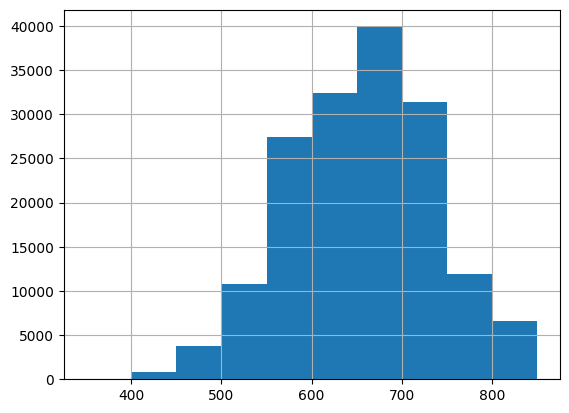

In [375]:
df3["CreditScore"].hist()

<Axes: >

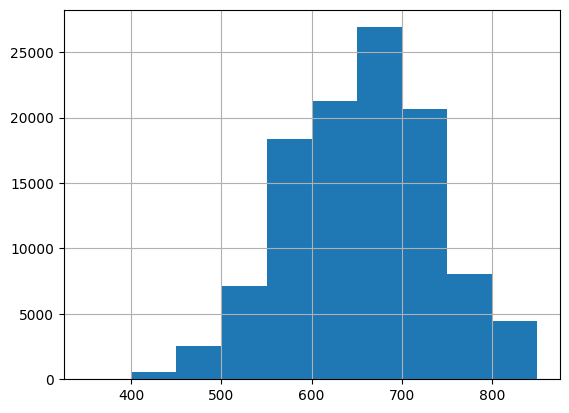

In [376]:
df_test["CreditScore"].hist()

<Axes: >

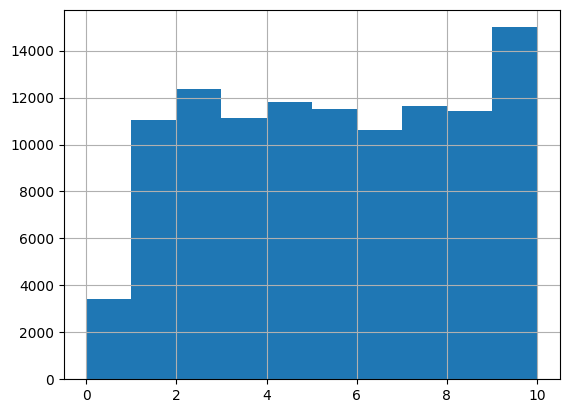

In [371]:
df_test["Tenure"].hist()

<Axes: >

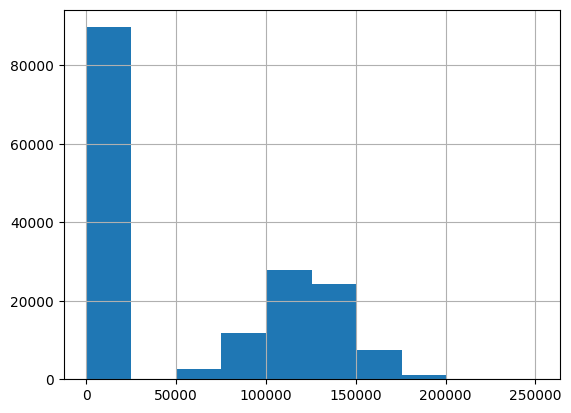

In [377]:
df3['Balance'].hist()

<Axes: >

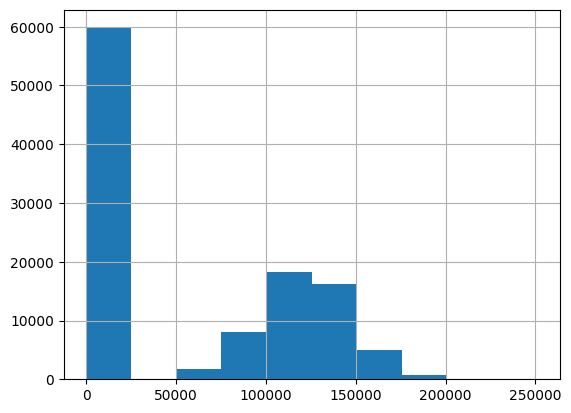

In [369]:
df_test['Balance'].hist()